# Load and execute the model

In [1]:
import platform
print("python version " + platform.python_version())
import sys
import json
import re
import os
from os.path import exists
if exists("config.cfg"):
    from configparser import ConfigParser
    config = ConfigParser()
    config.read("config.cfg")
    paths = config.get("script", "syspaths").split(";")
    for path in paths:
        sys.path.append(path)

python version 3.7.6


The ['rxn name', 'rxn'] columns were dropped from the phenotypes CSV.
The ['C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12'] trials were dropped from the ecoli measurements.
The ['B2', 'B12', 'G2', 'G12'] trials were removed from the ecoli measurements, with their deviation over time being less than the threshold of 2.
The ['C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12'] trials were dropped from the pf measurements.
The ['B2', 'B3', 'B12', 'G12'] trials were removed from the pf measurements, with their deviation over time being less than th

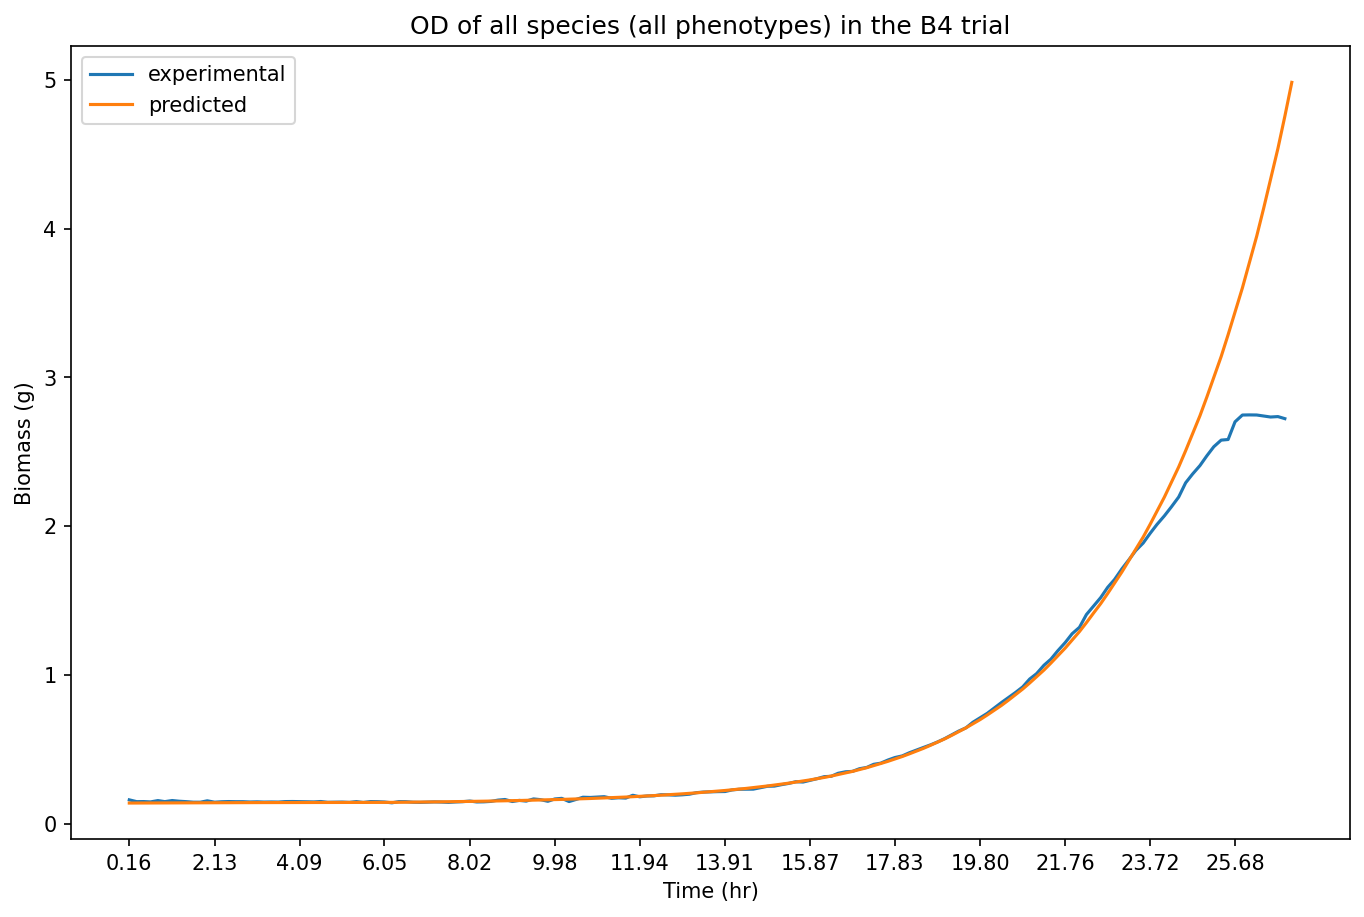

In [28]:
from datetime import datetime
%run mscommfitting.py

graphs = [
    {
        'trial':'B4',
        'content': 'OD',
        'experimental_data': True
    }
]

mscommfit = MSCommFitting()
mscommfit.load_data(phenotypes_csv_path = 'PhenotypeStoichiometry.csv', 
                           signal_tsv_paths = {'RFP_pf-ec_4-29-22.txt':'ecoli', 'GFP_pf-ec_4-29-22.txt':'pf', 'OD_pf-ec_4-29-22.txt':'OD'},
                           media_conc_path = 'media_conc.csv',
                           species_abundance_path = 'species_abundances.csv',
                           carbon_conc_series = {'rows': {
                               'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
                               'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
                               }},
                           ignore_trials = {'rows': ['C', 'D', 'E', 'F']}, # 'wells': ['C2', 'G3', 'C12']},  # 'columns': [6,7,8,9,10,11,12]},
                           # ignore_timesteps = [x for x in range(20,167)],
                           zip_path='mscomfit.zip'
                   )
print(datetime.today())
mscommfit.define_problem(parameters={
    'v':0.3,
    'cvmin': 100,
    'bcv': 100,
    'diffpos': 100,
    'diffneg': 100
    }, zip_name='simple_full_community.zip',final_relative_carbon_conc = 0.1, metabolites_to_track = ["cpd00179","cpd00029","cpd00136"])
print(datetime.today())
%time mscommfit.compute(graphs, zip_name='simple_full_community.zip')
print(datetime.today())
print('growth Vmax:', mscommfit.parameters['v'], 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')

# Change the parameters

## Explore Vmax values

Done loading the JSON: 0.10859375 min
Done exporting the model: 0.44583333333333336 min
Done loading the model: 2.1434895833333334 min
{'trial': 'B4', 'content': 'OD', 'experimental_data': True, 'phenotype': '*', 'species': '*'}
The solution is optimal.
CPU times: total: 2min 38s
Wall time: 2min 38s
growth Vmax: 0.1 objective value: 536111.8798909037 




2022-07-16 16:59:39.802761
Done loading the JSON: 0.13333333333333333 min
Done exporting the model: 0.4388020833333333 min
Done loading the model: 2.210677083333333 min
{'trial': 'B4', 'content': 'OD', 'experimental_data': True, 'phenotype': '*', 'species': '*'}
The solution is optimal.
CPU times: total: 2min 55s
Wall time: 2min 55s
growth Vmax: 0.13333333333333336 objective value: 388874.9153763641 




2022-07-16 17:05:22.669535
Done loading the JSON: 0.03515625 min
Done exporting the model: 0.44635416666666666 min
Done loading the model: 2.1822916666666665 min
{'trial': 'B4', 'content': 'OD', 'experimental_data': True, 'phenotype':

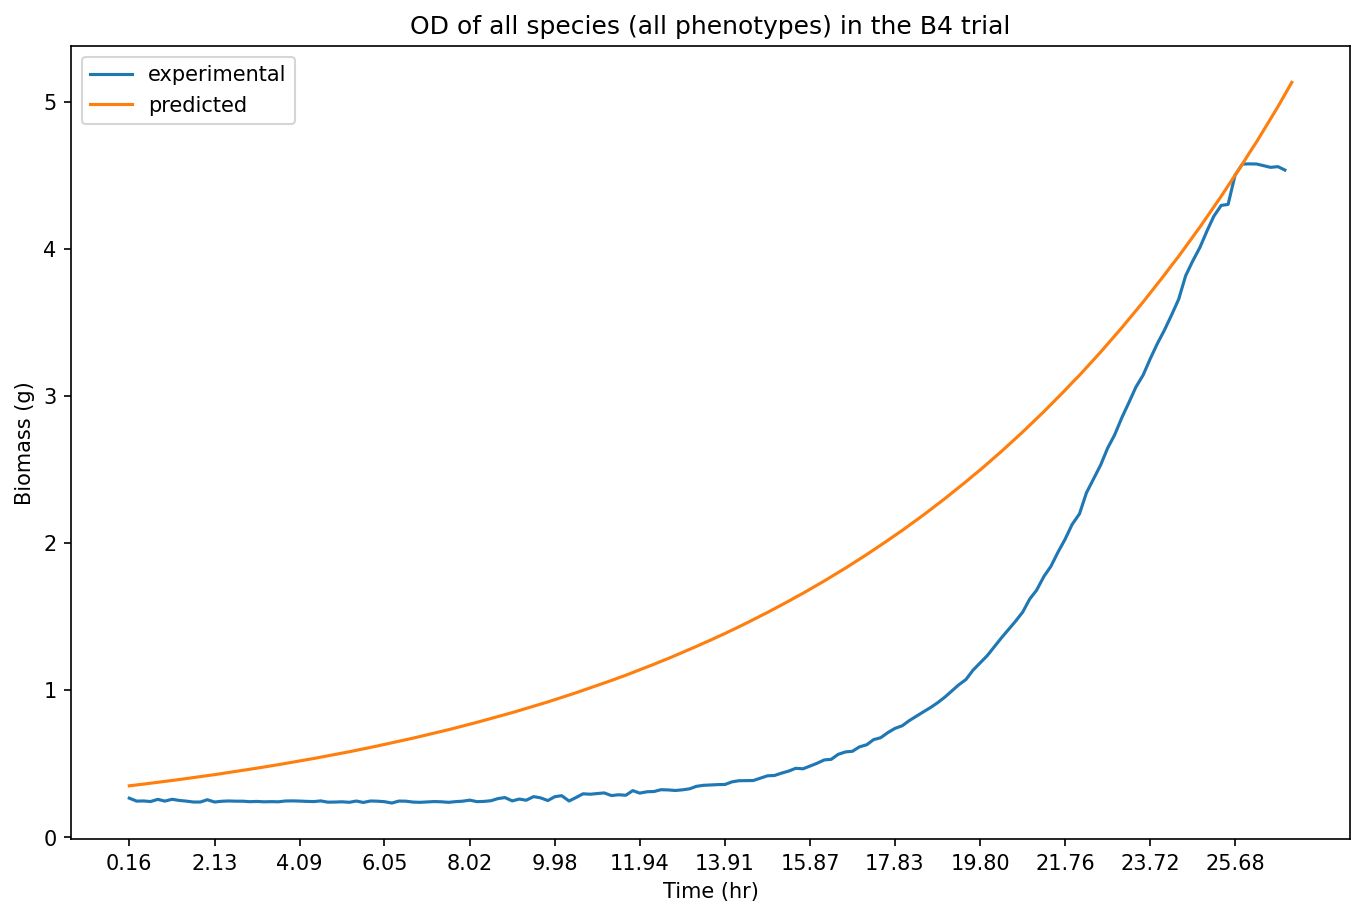

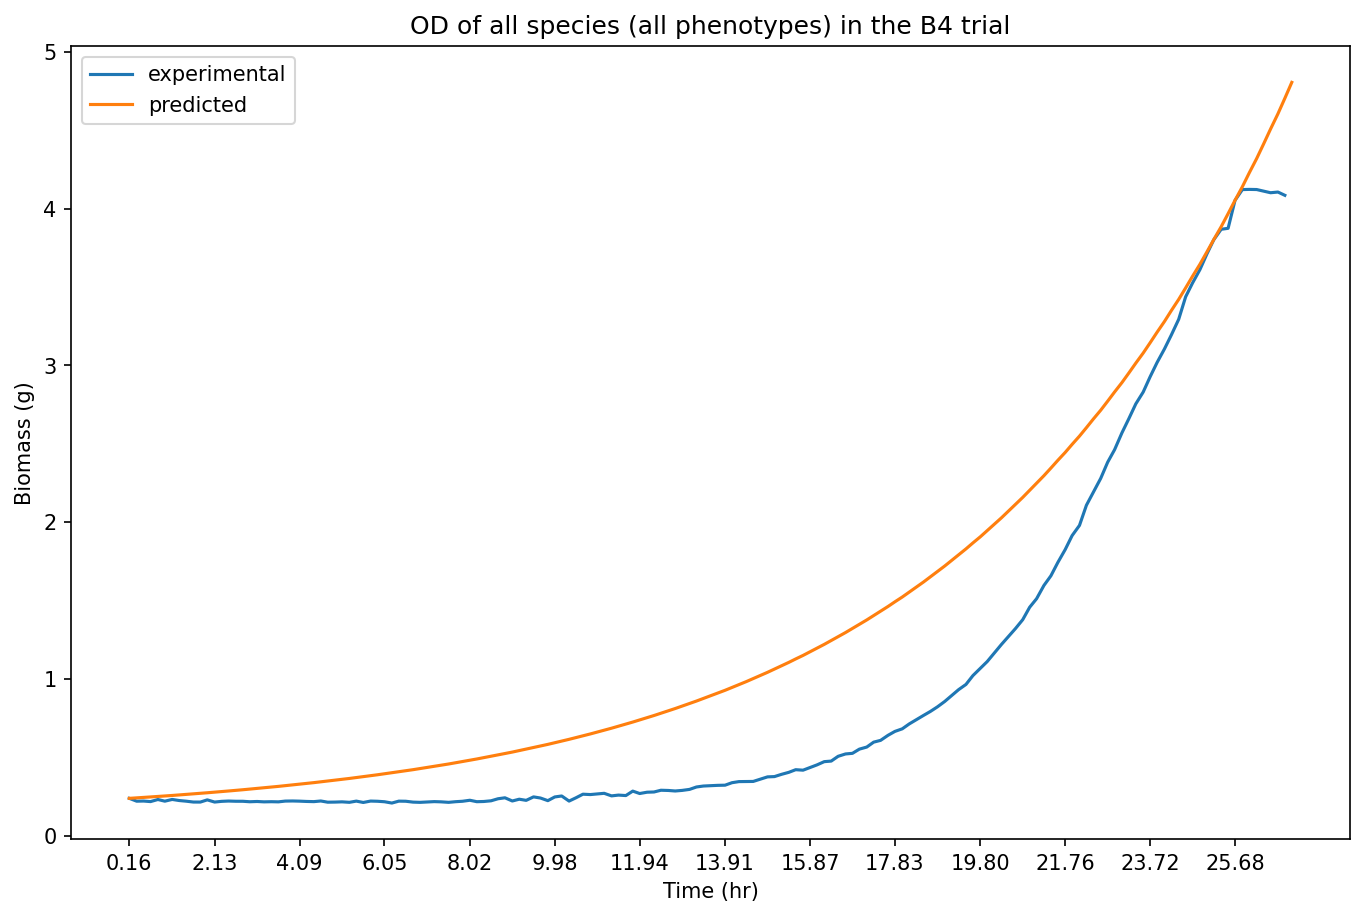

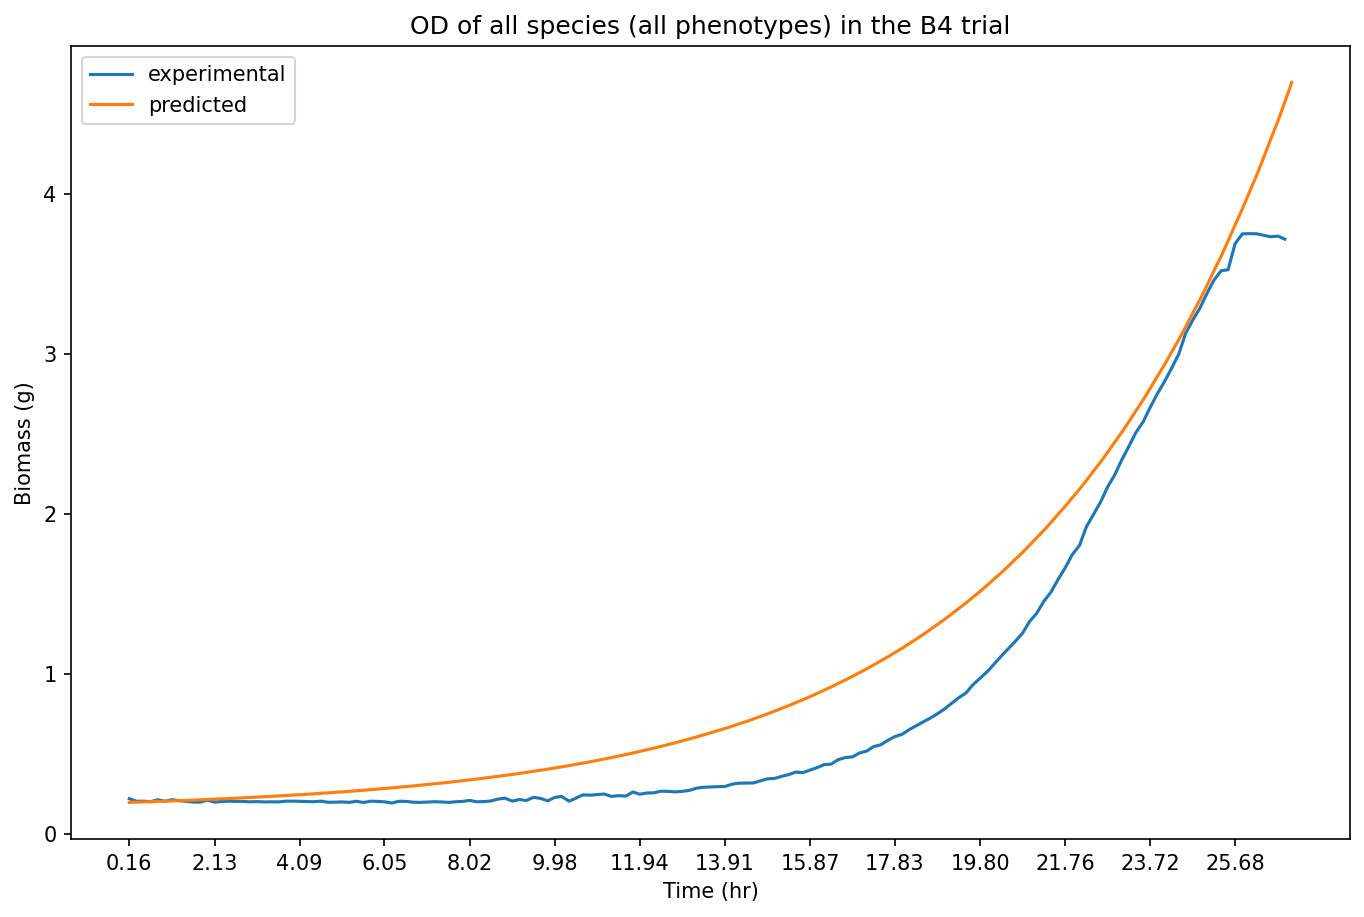

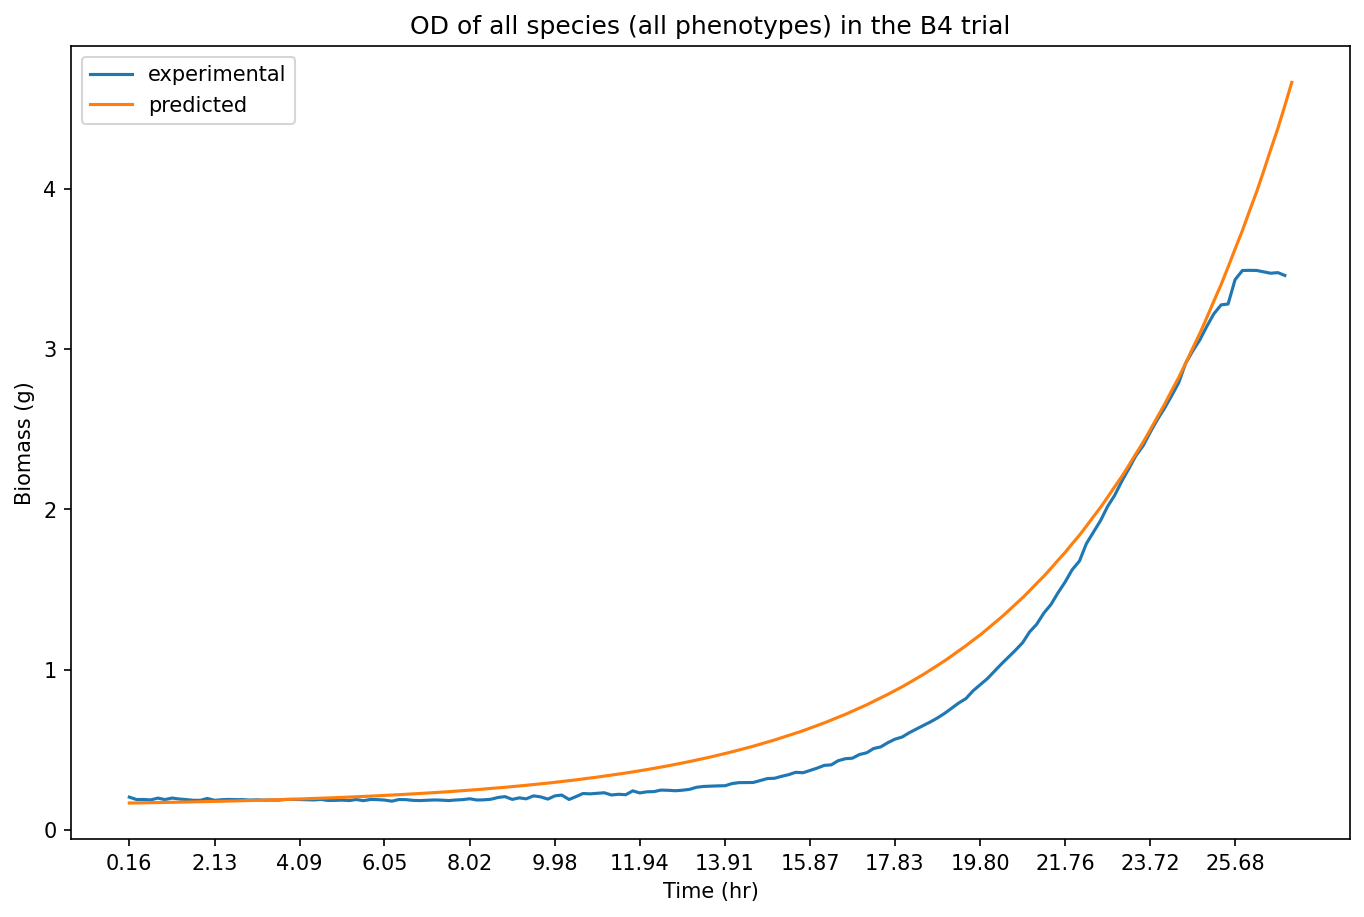

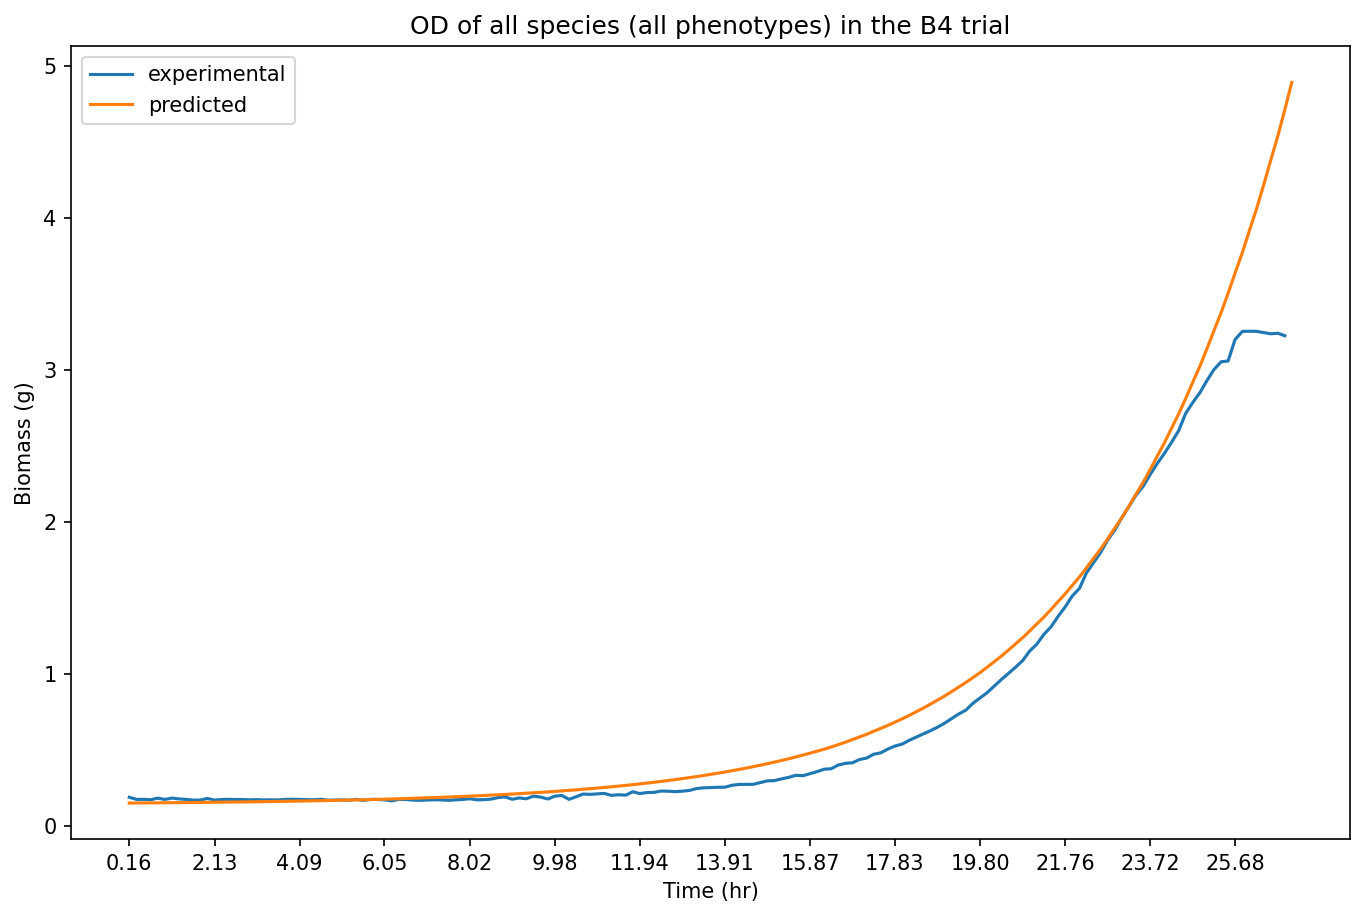

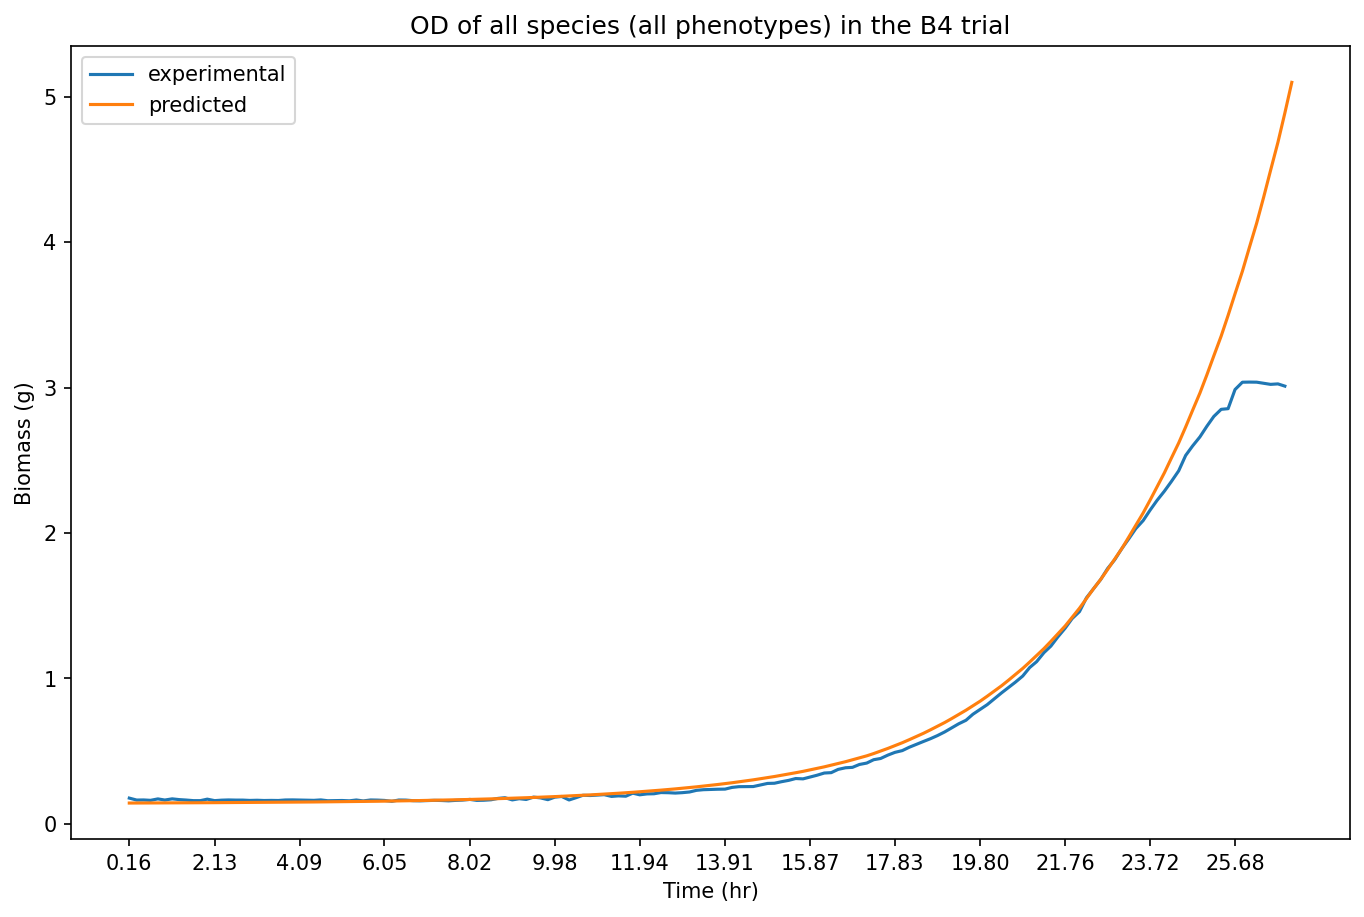

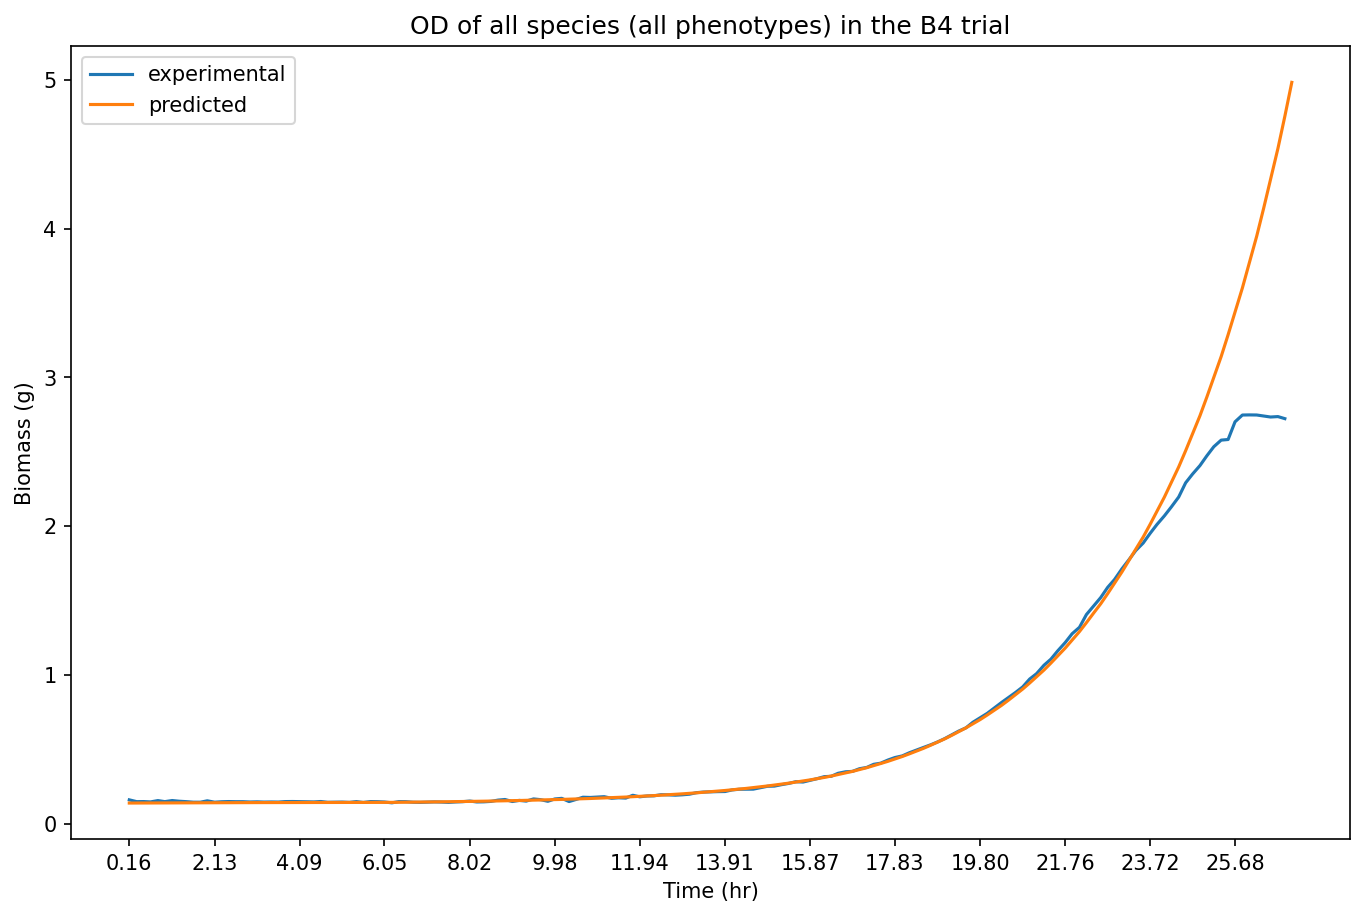

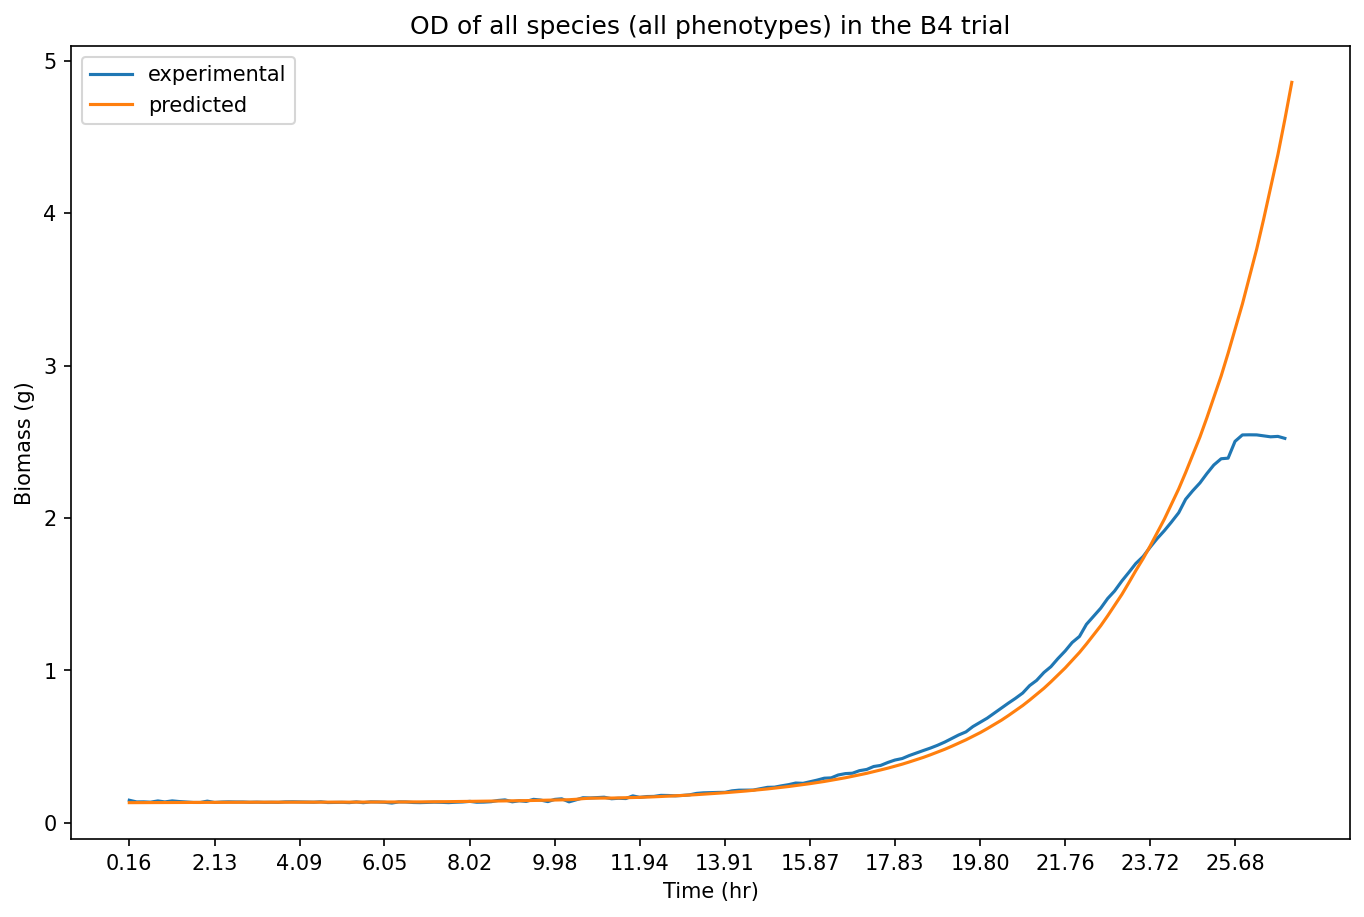

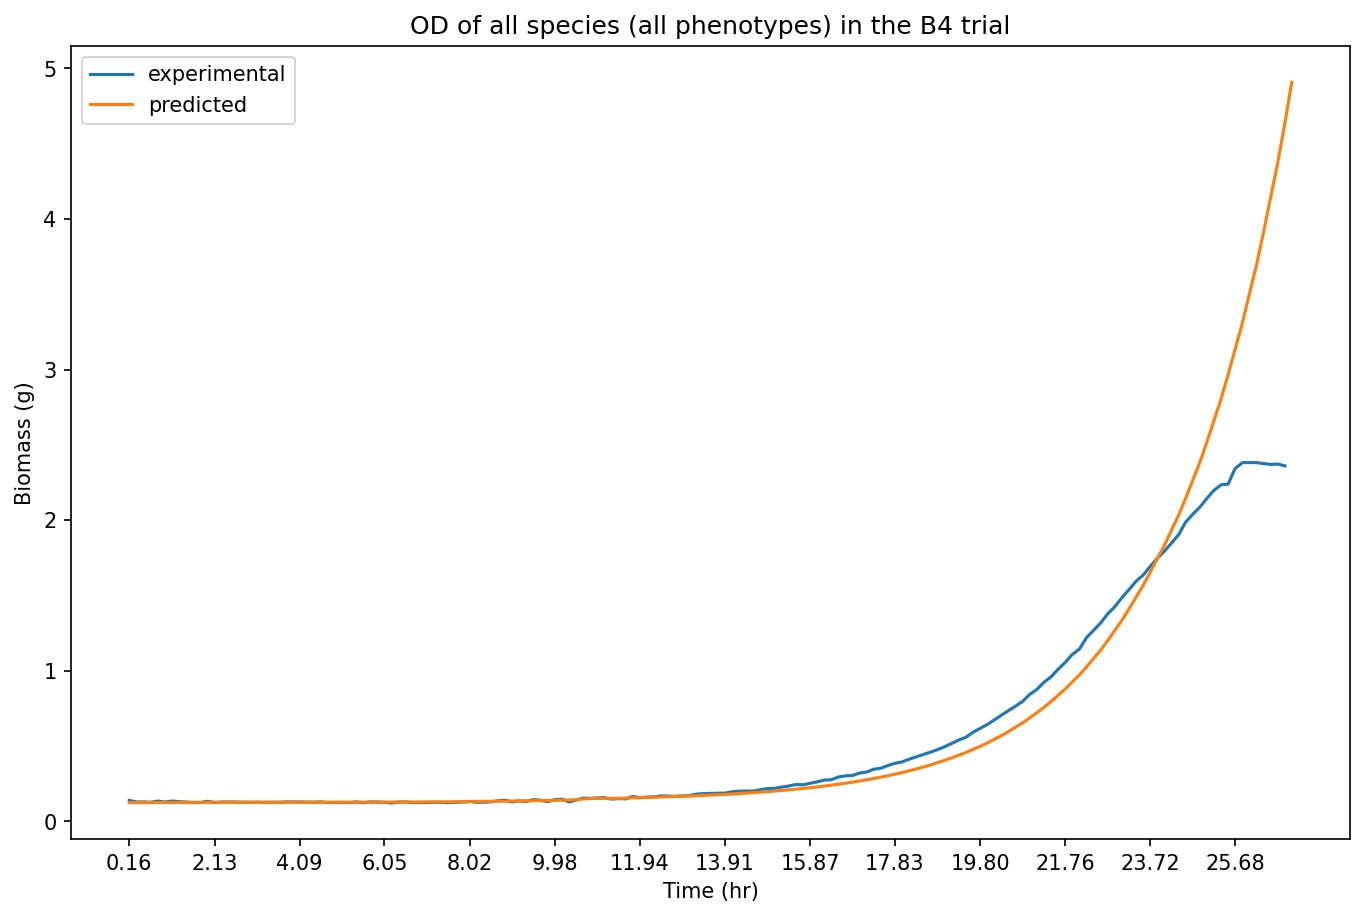

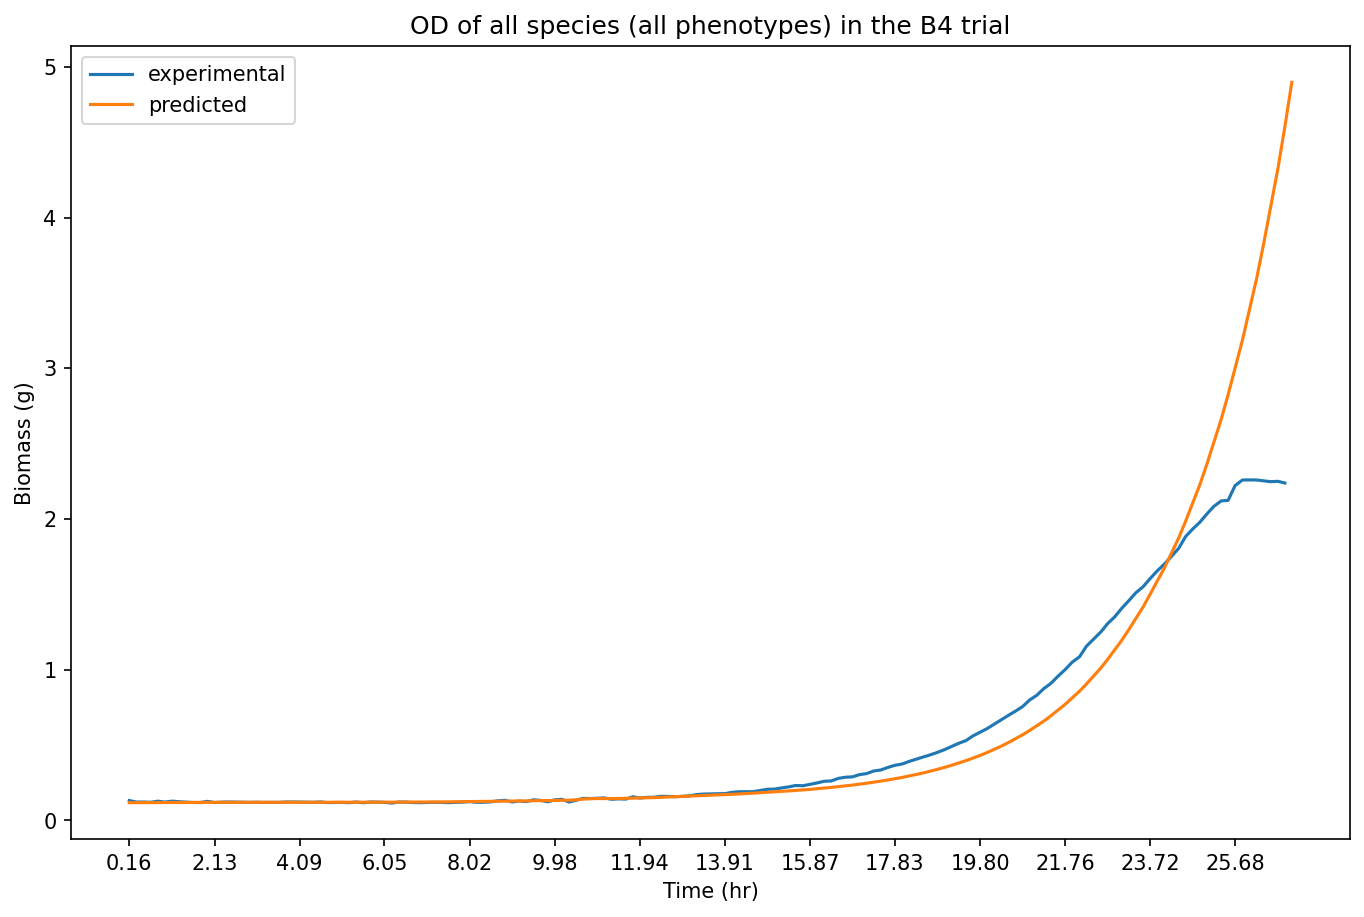

In [10]:
from numpy import linspace
%run mscommfitting.py

for vmax in linspace(.1,.4,10):
    mscommfit.change_parameters(vmax=-vmax, export_zip_name='simple_full_community_edited.zip', extract_zip_name='simple_full_community.zip')
    %time mscommfit.compute(graphs, 'simple_full_community_edited.zip')
    print(datetime.today())
    print('growth Vmax:', vmax, 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')

## Explore relative final concentrations

Done loading the JSON: 0.11875 min
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.4
0.4000000000000001
0.4
0.4000000000000001
0.4
0.4000000000000001
0.4
0.4000000000000001
0.4
0.4000000000000001
0.4
0.4000000000000001
0.4
0.4000000000000001
0.4
0.4000000000000001
0.4
0.4000000000000001
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'mscommfitting.json'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


Done exporting the model: 0.4578125 min
Done loading the model: 2.550520833333333 min


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'primal_values.json'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


{'trial': 'B4', 'content': 'OD', 'experimental_data': True, 'phenotype': '*', 'species': '*'}
The solution is optimal.
CPU times: total: 3min 15s
Wall time: 3min 15s
2022-07-16 21:16:10.160858
final_relative_carbon_conc: 0.1 objective value: 218366.75508039558 






C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'B4_all species_all phenotypes_OD.jpg'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


Done loading the JSON: 0.037760416666666664 min
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.4
0.8000000000000002
0.4
0.8000000000000002
0.4
0.8000000000000002
0.4
0.8000000000000002
0.4
0.8000000000000002
0.4
0.8000000000000002
0.4
0.8000000000000002
0.4
0.8000000000000002
0.4
0.8000000000000002
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
Done exporting the model: 0.4544270833333333 min
Done loading the model: 2.439583333333333 min
{'trial': 'B4', 'content': 'OD', 'experimental_data': True, 'phenotype': '*', 'species': '*'}
The solution is optimal.
CPU times: total: 3min 9s
Wall time: 3min 9s
2022-07-16 21:22:17.308170
final_relative_carbon_conc: 0.2 objective value: 194103.7822936868 




Done loading the JSON: 0.17265625 min
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.4
1.2000000000000002
0.4
1.2000000000000002
0.4
1.200000000

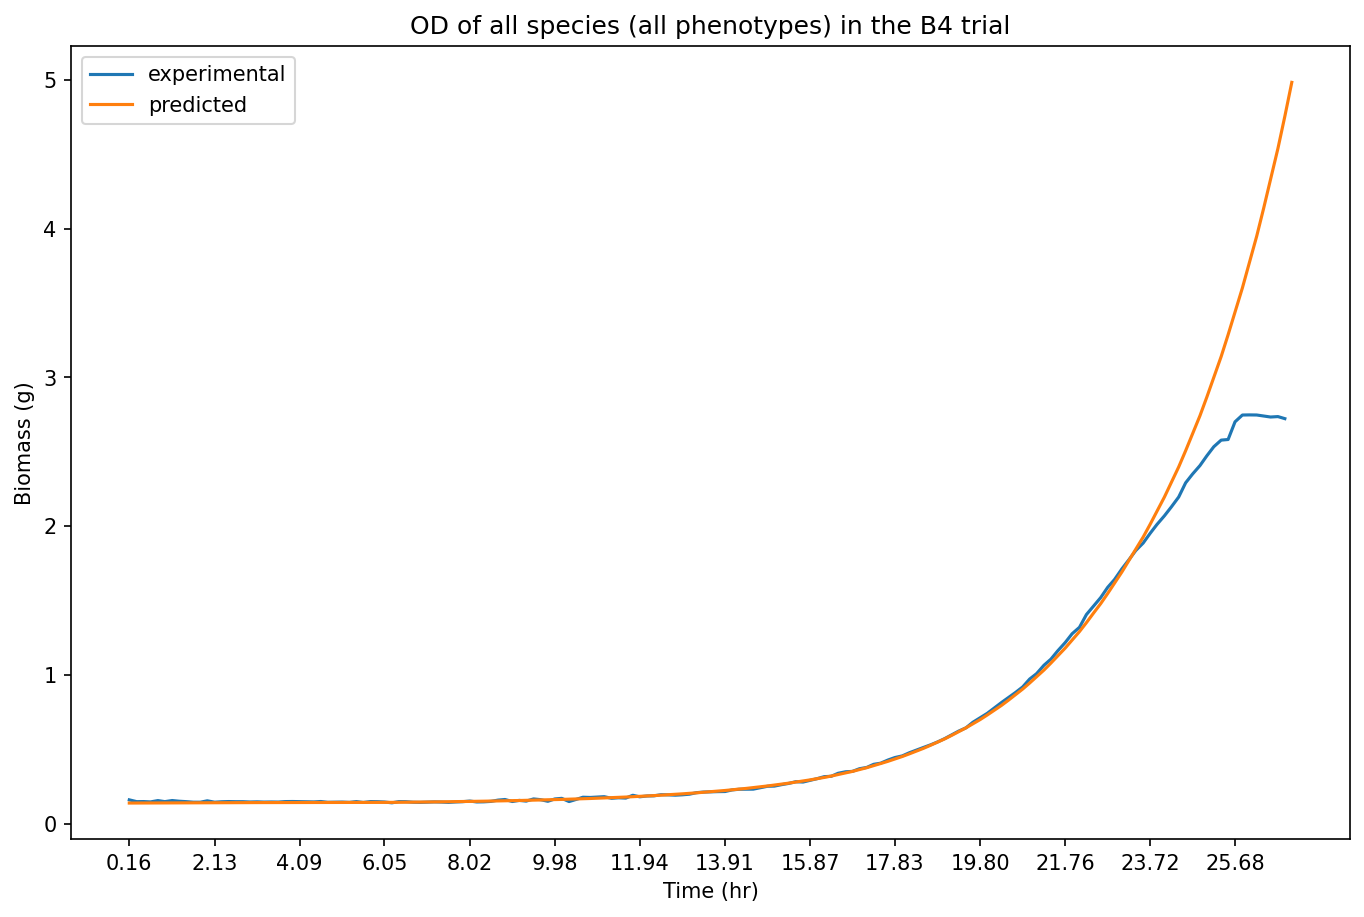

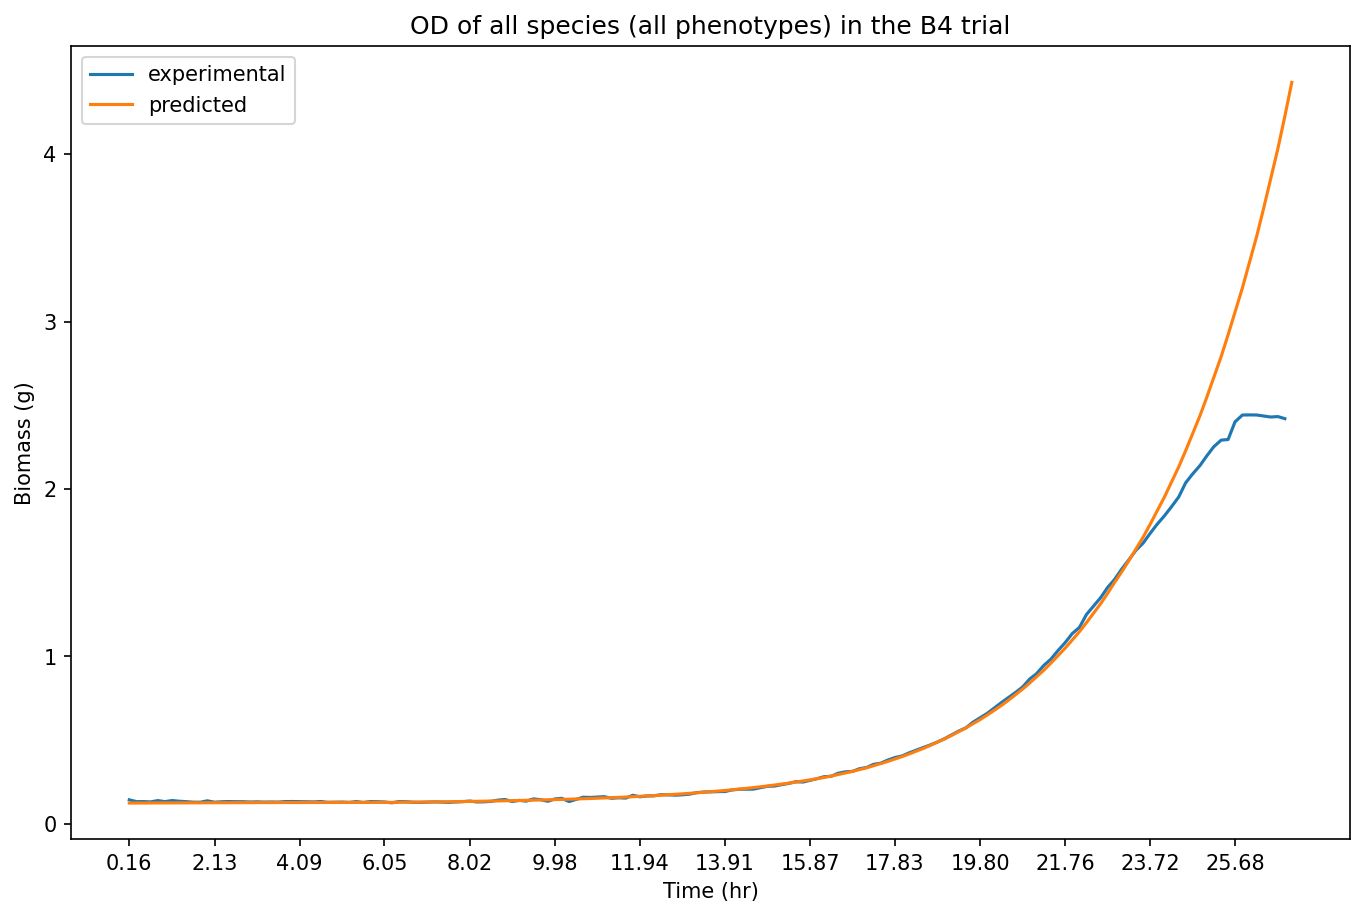

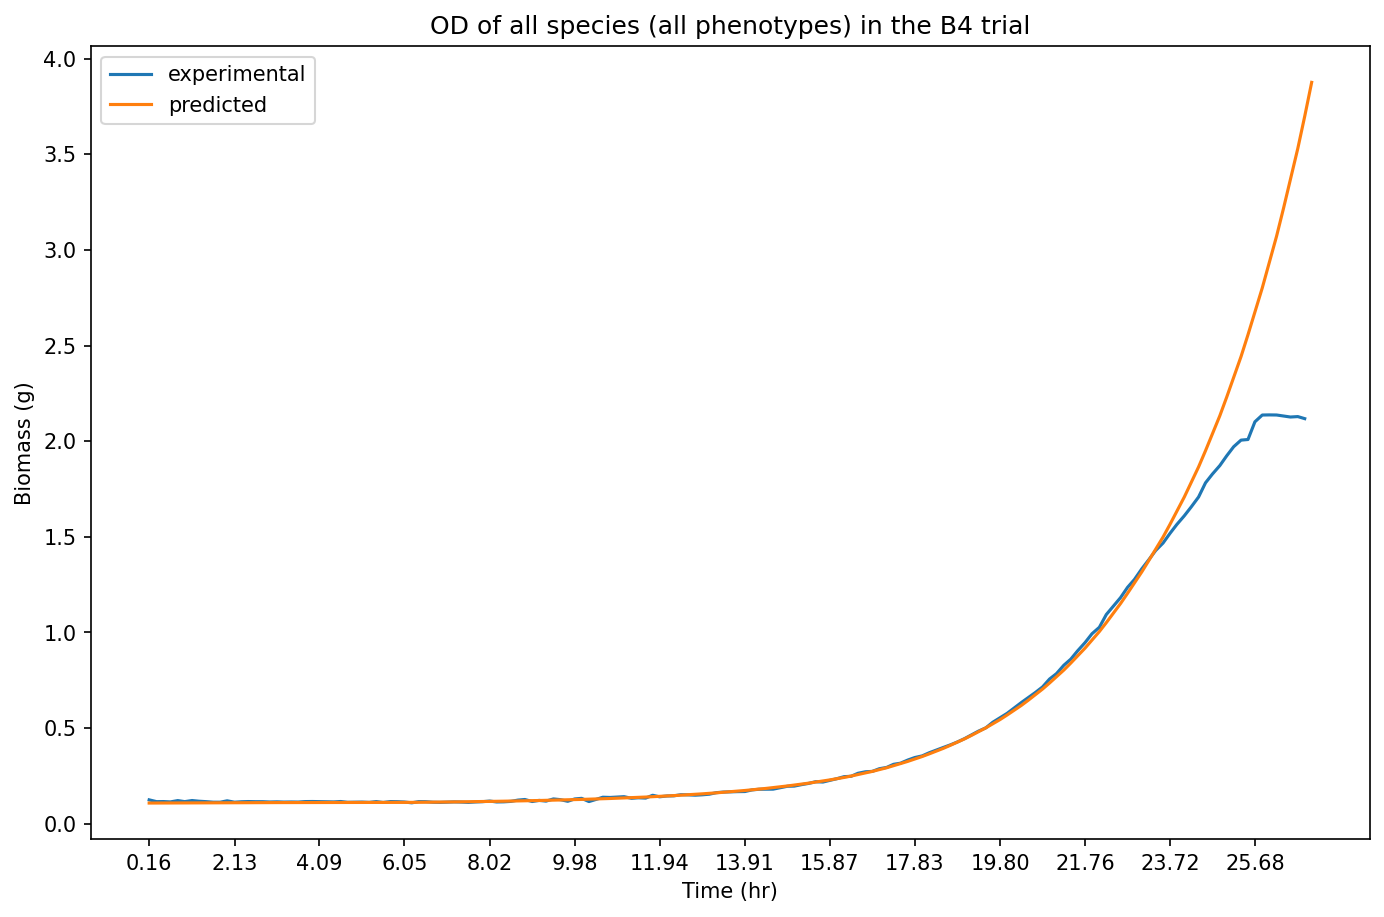

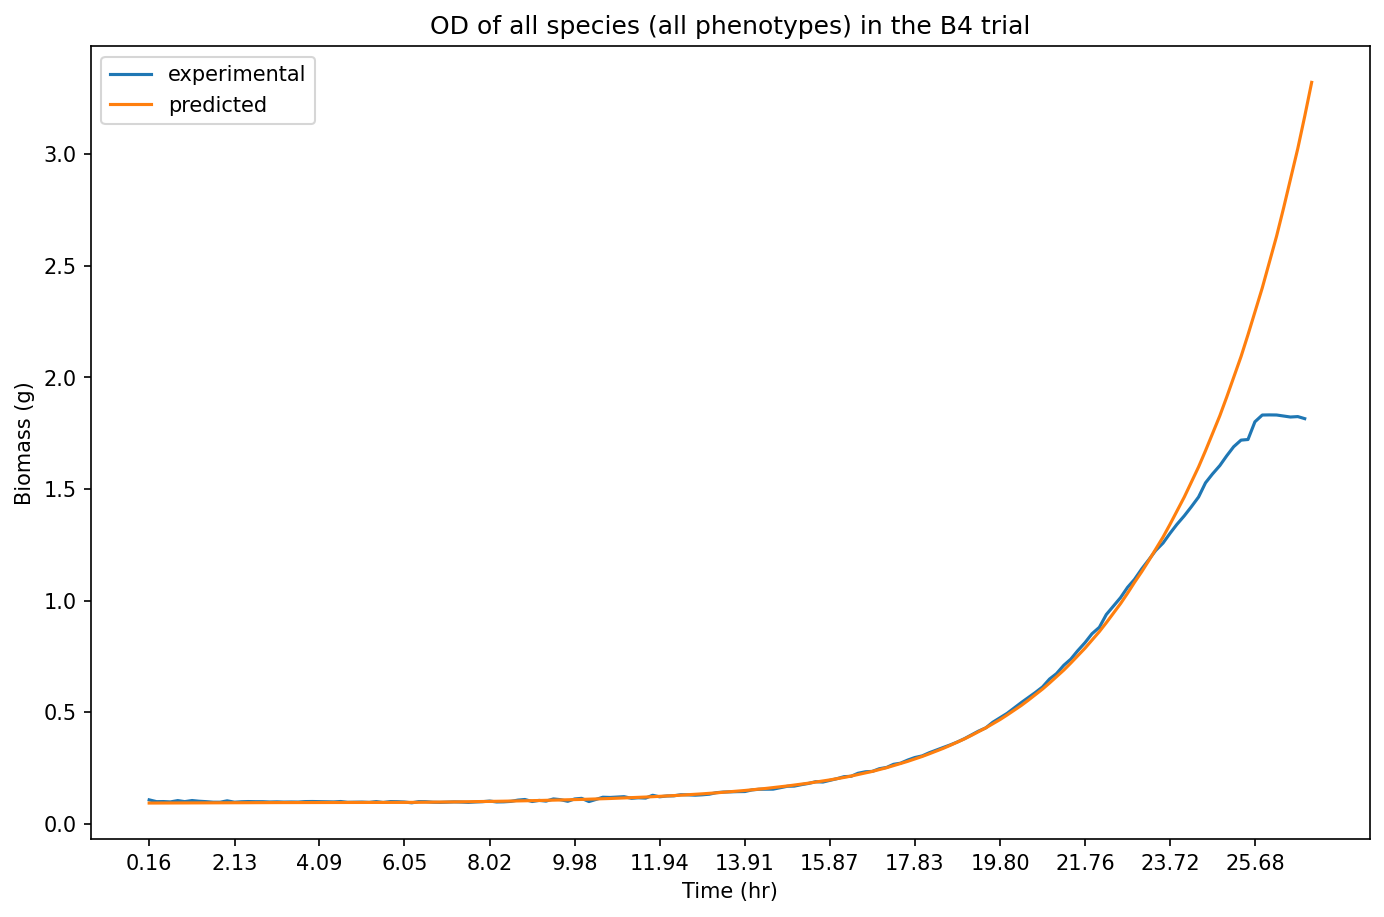

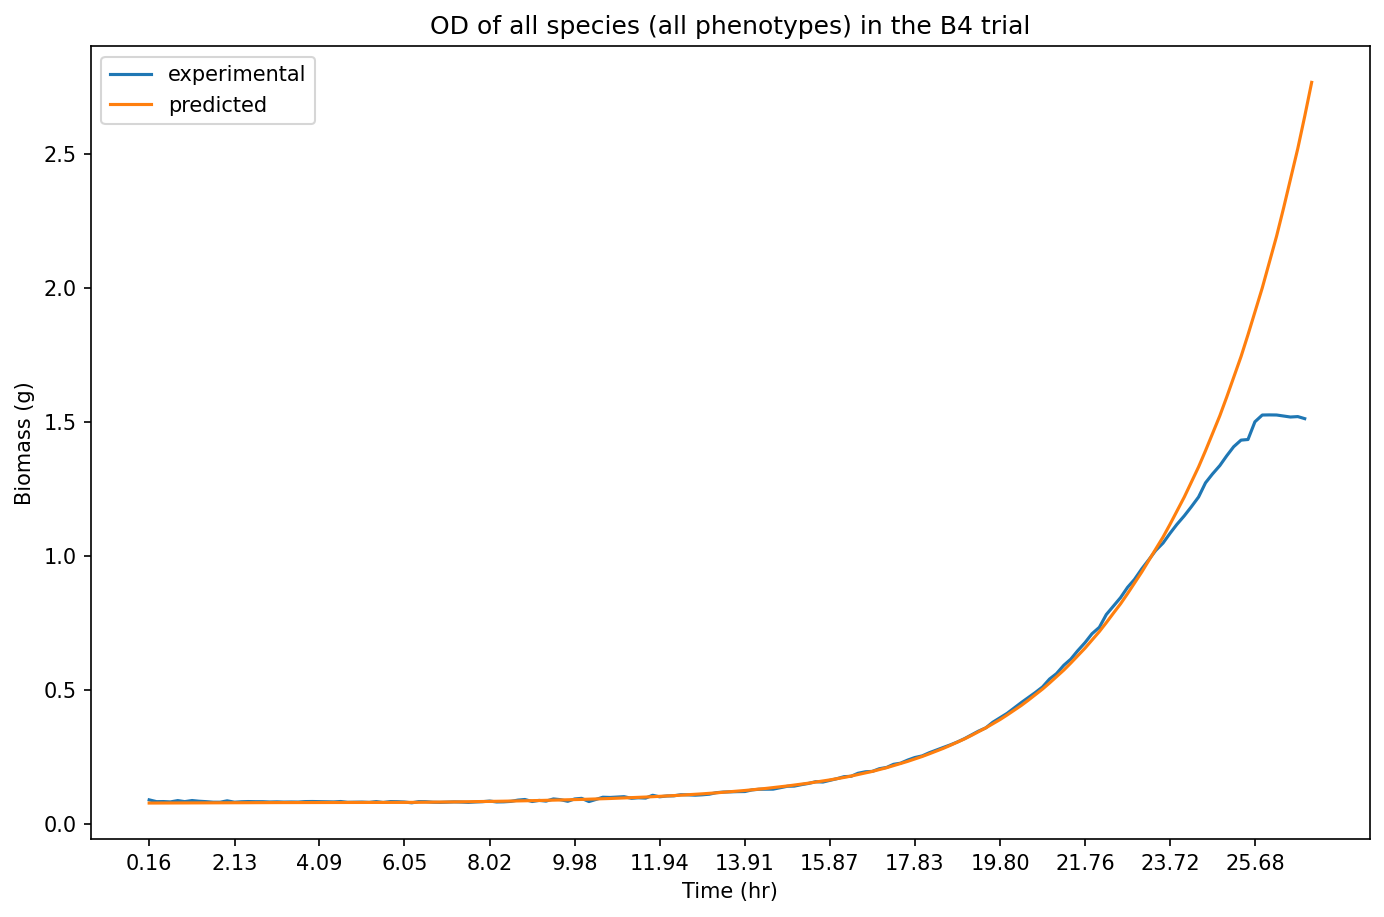

In [29]:
from numpy import linspace
%run mscommfitting.py

previous_relative_conc = .1
for final_relative_carbon_conc in linspace(.1,.5,5):
    mscommfit.change_parameters(final_relative_carbon_conc=final_relative_carbon_conc, previous_relative_conc=previous_relative_conc, export_zip_name='simple_full_community_edited.zip', extract_zip_name='simple_full_community.zip')
    %time mscommfit.compute(graphs, 'simple_full_community_edited.zip')
    print(datetime.today())
    print('final_relative_carbon_conc:', final_relative_carbon_conc, 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')

## Km calculation for maltose

The ['rxn name', 'rxn'] columns were dropped from the phenotypes CSV.
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements.
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the pf measurements.
The ['B2', '

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'primal_values.json'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'B4_all species_all phenotypes_all_biomass.jpg'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


Done loading the JSON: 0.0015625 min
met_name c_EX_cpd00029_e0
met_name c_EX_cpd00136_e0
met_name c_EX_cpd00179_e0
cpd00179
new growth rate:  -0.3238095714285714
new growth rate:  -0.32386470024680236
new growth rate:  -0.3239226229965644
new growth rate:  -0.32398348234730895
new growth rate:  -0.32404742836493844
new growth rate:  -0.32411461890676796
new growth rate:  -0.32415862112698346
new growth rate:  -0.32417824797996647
new growth rate:  -0.3241988648850897
new growth rate:  -0.3242205219197474
new growth rate:  -0.32424327170827133
new growth rate:  -0.32426716955291357
new growth rate:  -0.32429227357171436
new growth rate:  -0.32431864484363154
new growth rate:  -0.32434634756133296
new growth rate:  -0.32437544919207206
new growth rate:  -0.32440602064709756
new growth rate:  -0.32443813646007075
new growth rate:  -0.3244718749749953
new growth rate:  -0.3245073185441934
new growth rate:  -0.32454455373689656
new growth rate:  -0.324583671559053
new growth rate:  -0.32462

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'mscommfitting.json'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


Done exporting the model: 0.7065104166666667 min
Done loading the model: 0.09765625 min
2022-07-22 18:51:19.091646


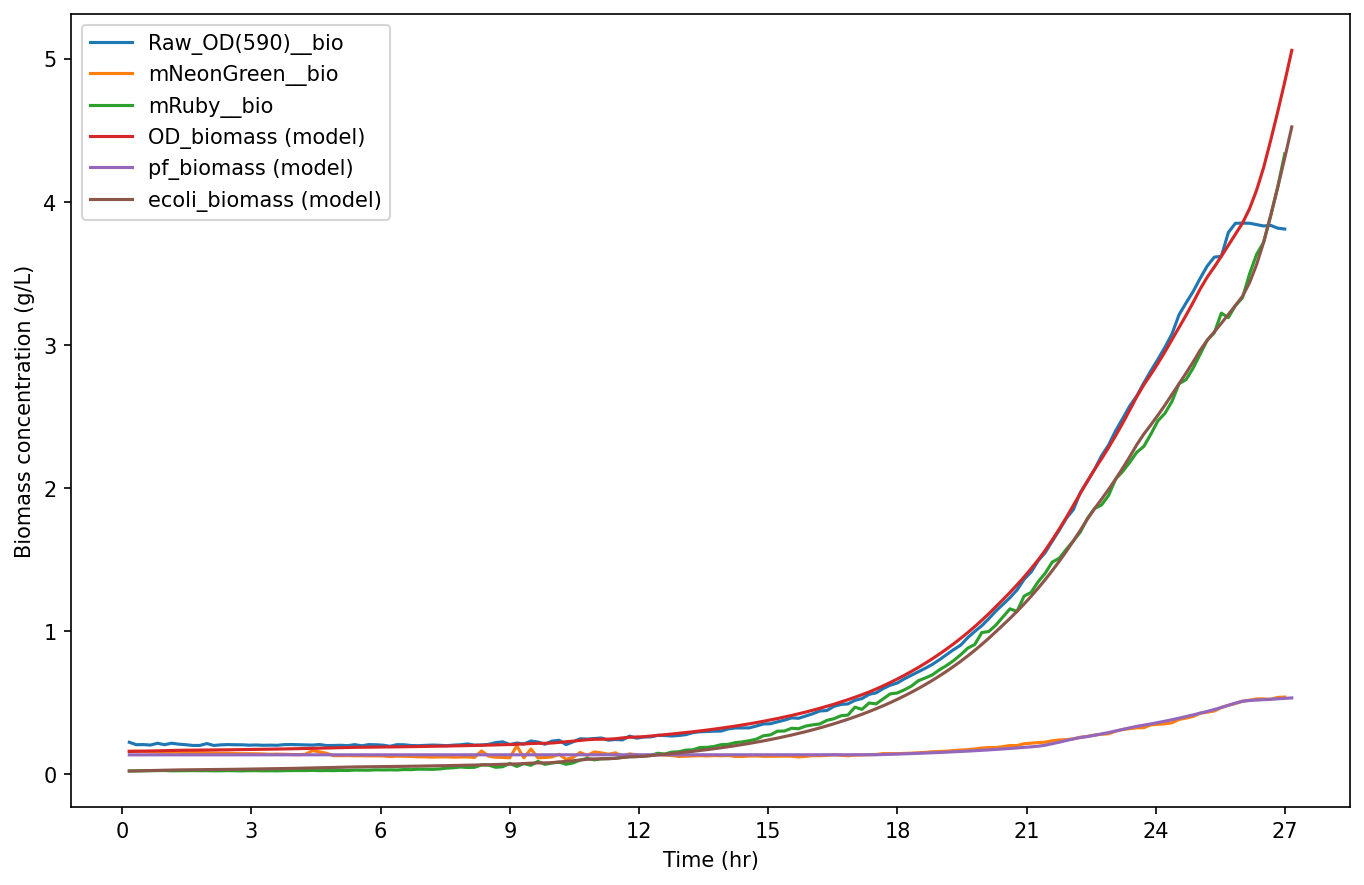

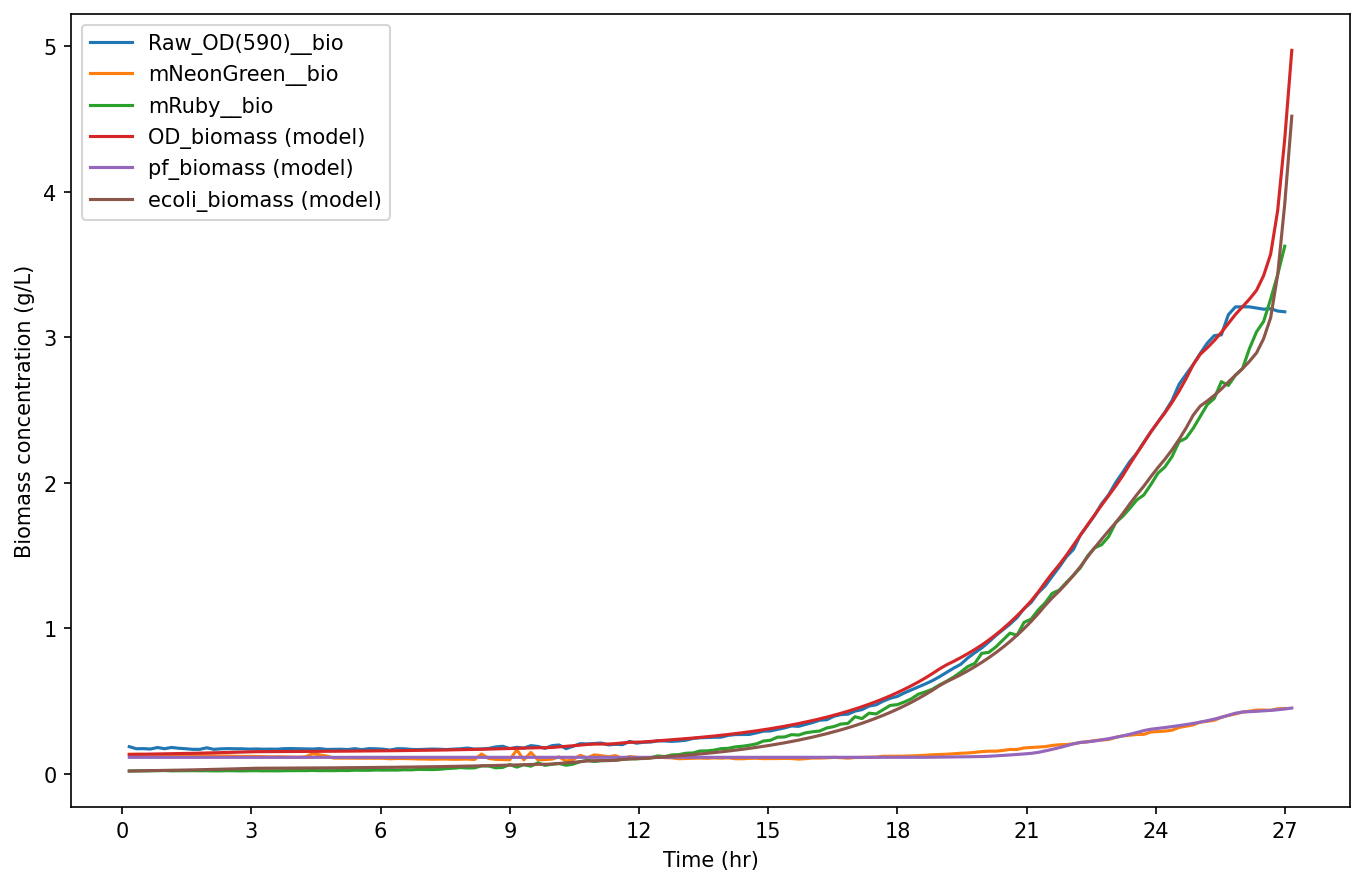

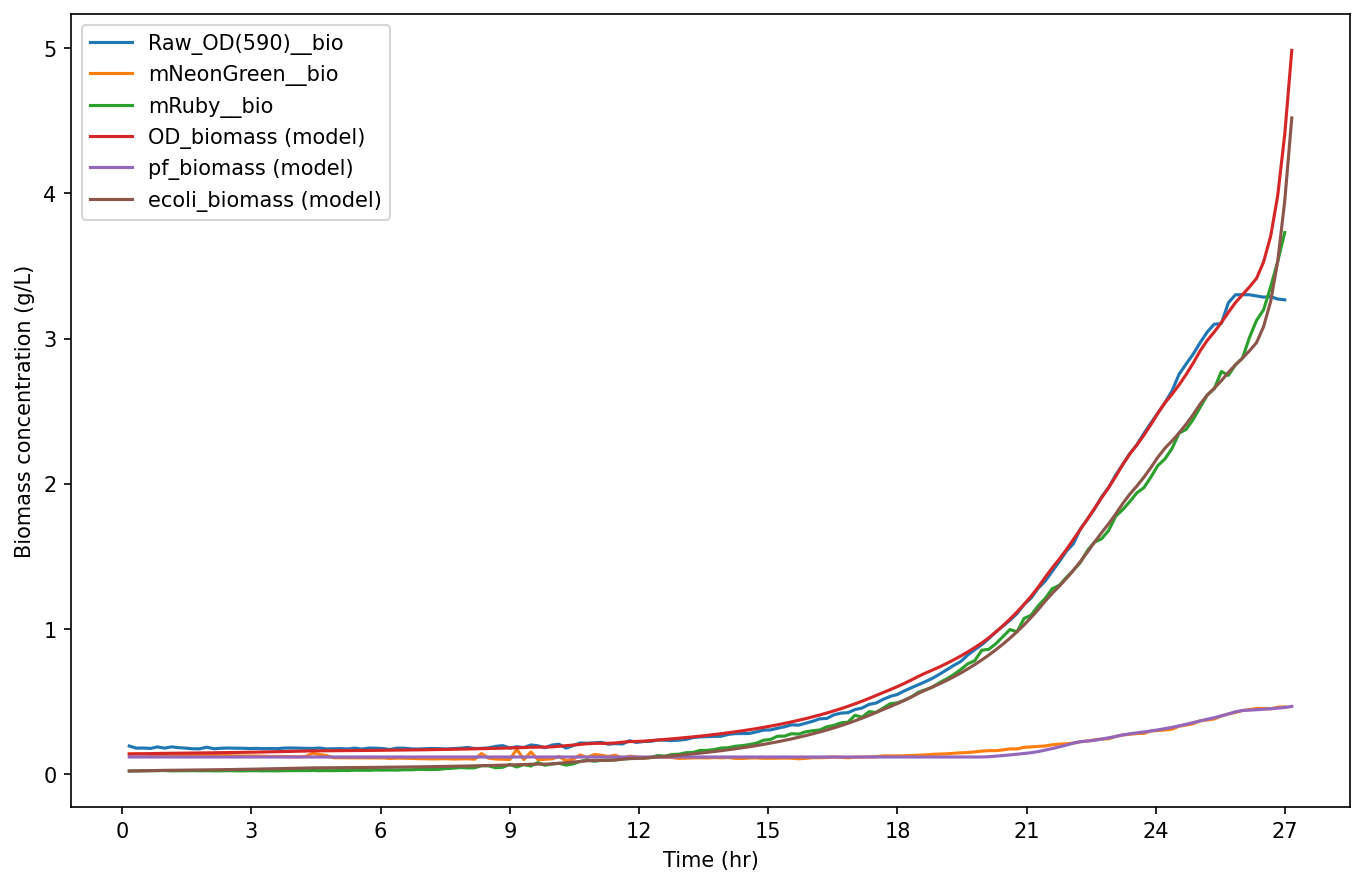

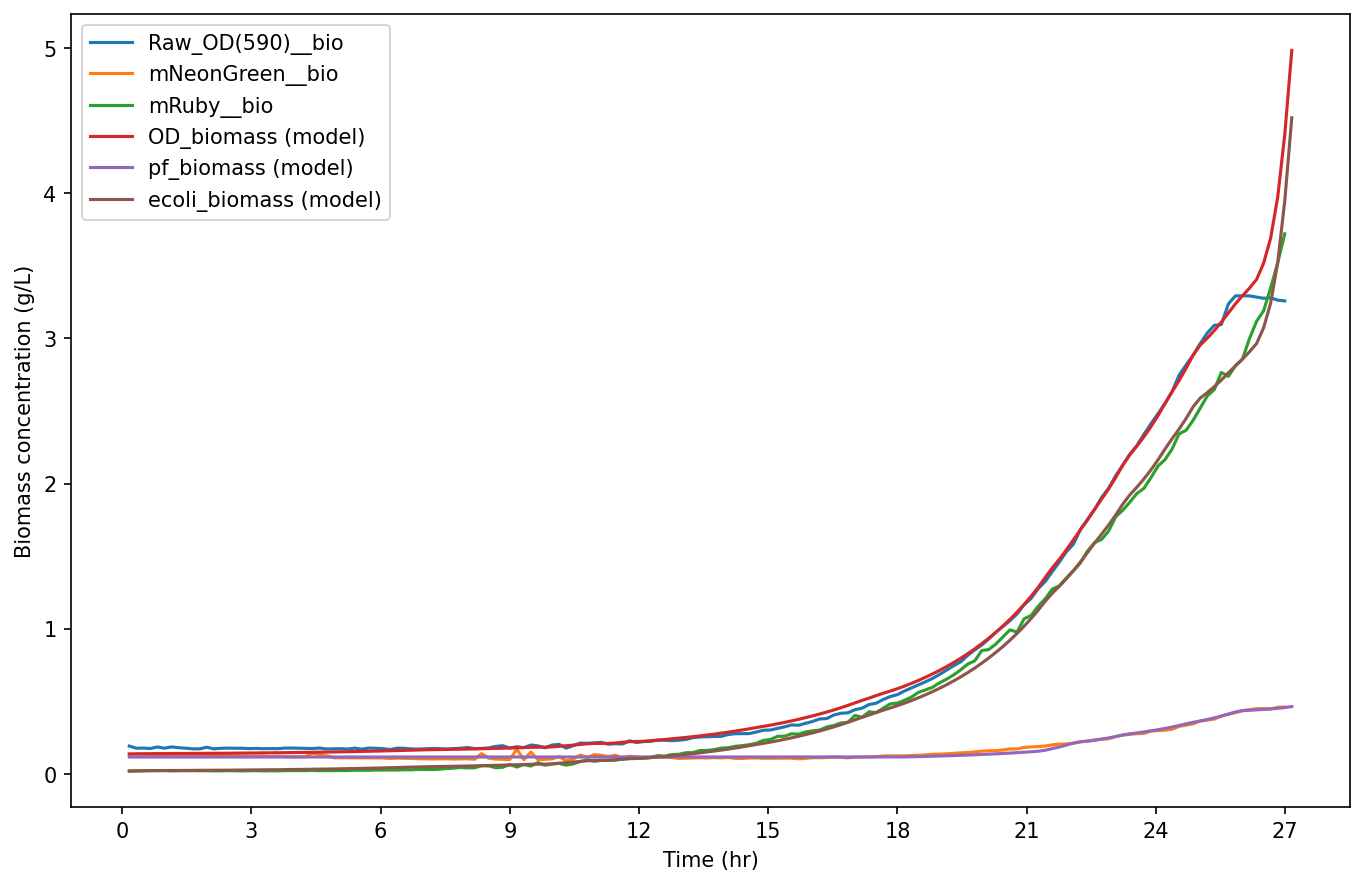

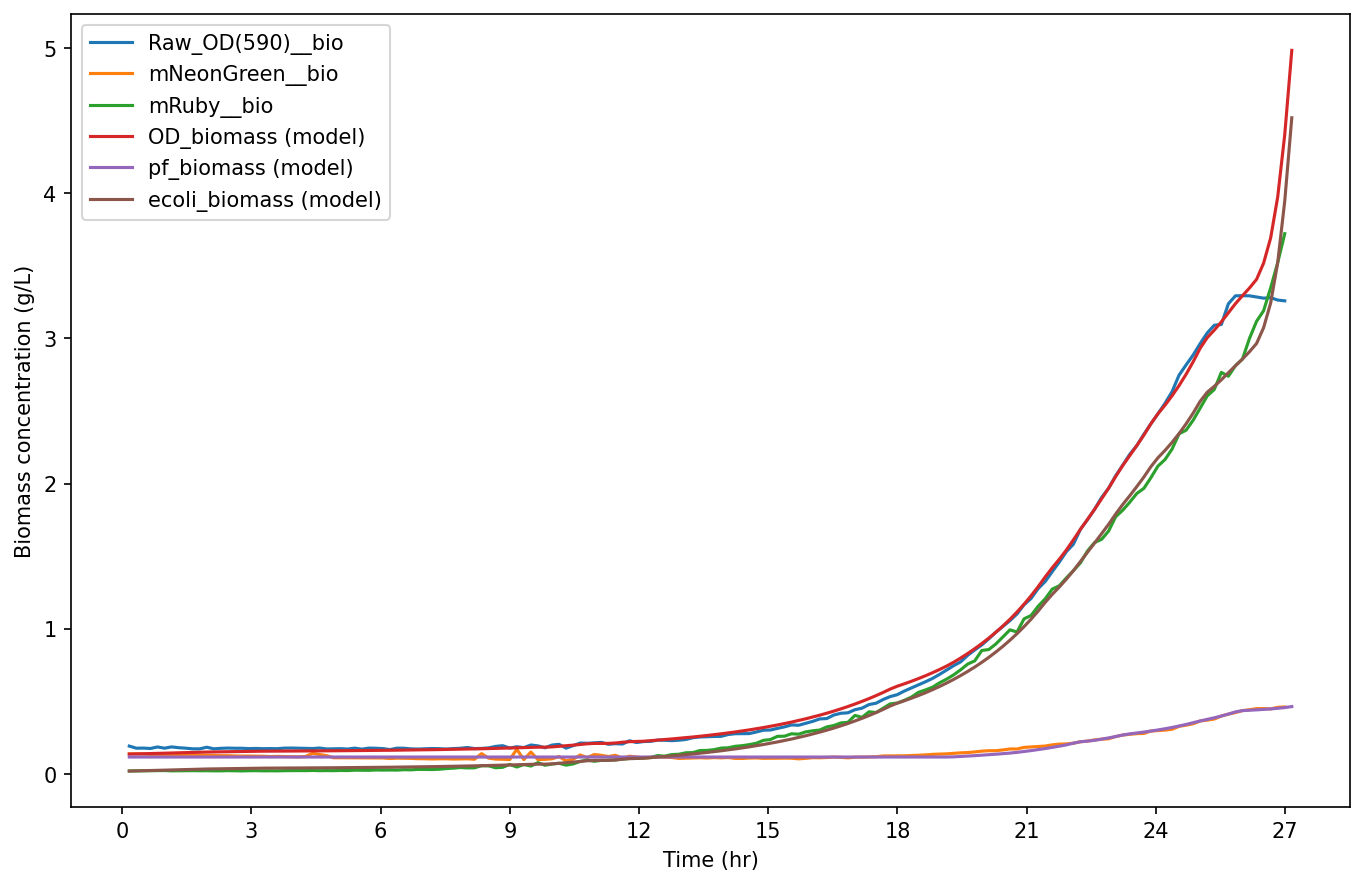

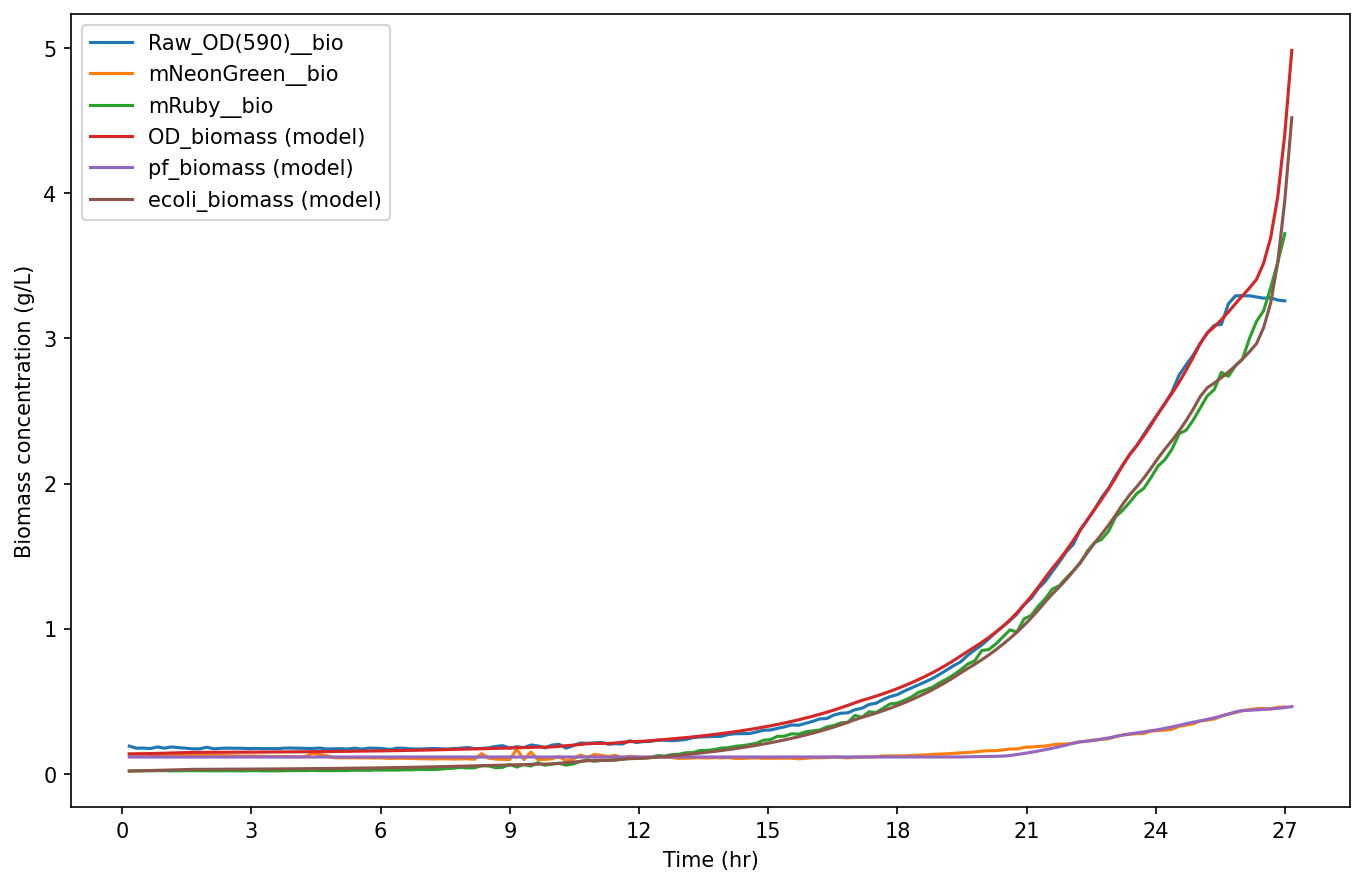

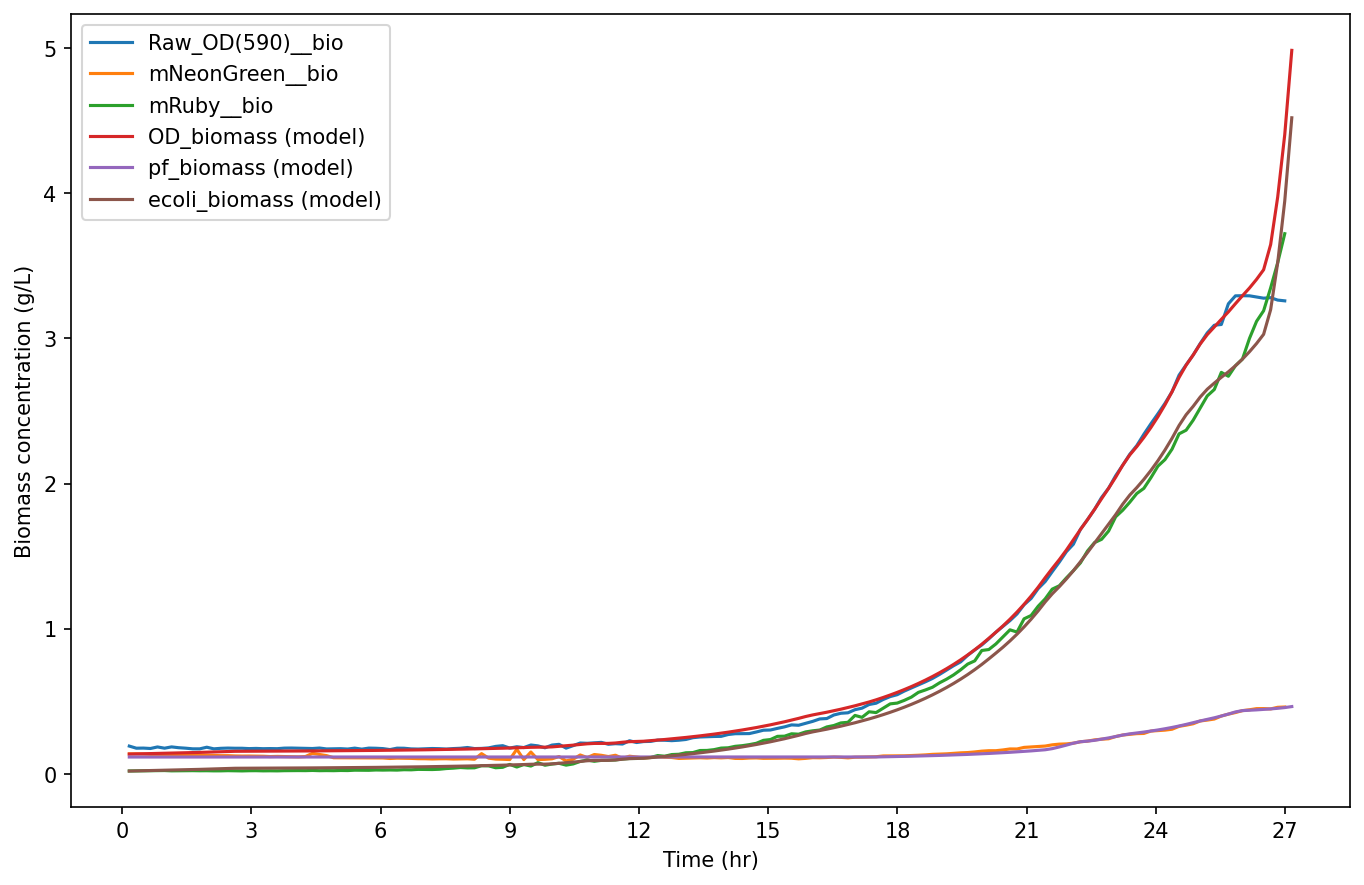

In [38]:
from datetime import datetime
%run mscommfitting.py

# define the content
vmax = {
    'cpd00179': 2.266667
}
km = {
    'cpd00179': 2
}
phenotype_met = {
    'ecoli_malt': 'cpd00179'
}


graphs = [
    {
        'trial':'B4',
        'content': 'all_biomass',
        'experimental_data': True
    }
]

mscommfit = MSCommFitting()
mscommfit.load_data(phenotypes_csv_path = 'PhenotypeStoichiometry.csv', 
                           signal_csv_paths = {'path':'PF-EC 4-29-22 ratios and 4HB changes (1).xlsx', 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
                           media_conc_path = 'media_conc.csv',
                           species_abundance_path = 'species_abundances.csv',
                           phenotype_met = phenotype_met,
                           carbon_conc_series = {'rows': {
                               'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
                               'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
                               }},
                            ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,5,6,7,8,9,10,11,12]}, # 'wells': ['C2', 'G3', 'C12']}
                           # ignore_timesteps = [x for x in range(20,167)],
                           # zip_path='mscomfit.zip'
                   )
print(datetime.today())
mscommfit.define_problem(parameters={
    'v':0.3,
    'cvmin': 100,
    'bcv': 100,
    'diffpos': 100,
    'diffneg': 100
    }, 
    # zip_name='simple_full_community.zip',
    final_relative_carbon_conc = 0.1, metabolites_to_track = ["cpd00179","cpd00029","cpd00136"])
%time mscommfit.compute(graphs, 'simple_full_community_edited.zip')
mscommfit.change_parameters(vmax=vmax, km=km, strain='ecoli_malt', graphs=graphs,
                            export_zip_name='simple_full_community_edited.zip', extract_zip_name='simple_full_community.zip')

print(datetime.today())

# B4 sans bad data

The ['rxn name', 'rxn'] columns were dropped from the phenotypes CSV.
['ecoli', 'pf', 'OD']
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the ecoli measurements.
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the pf m

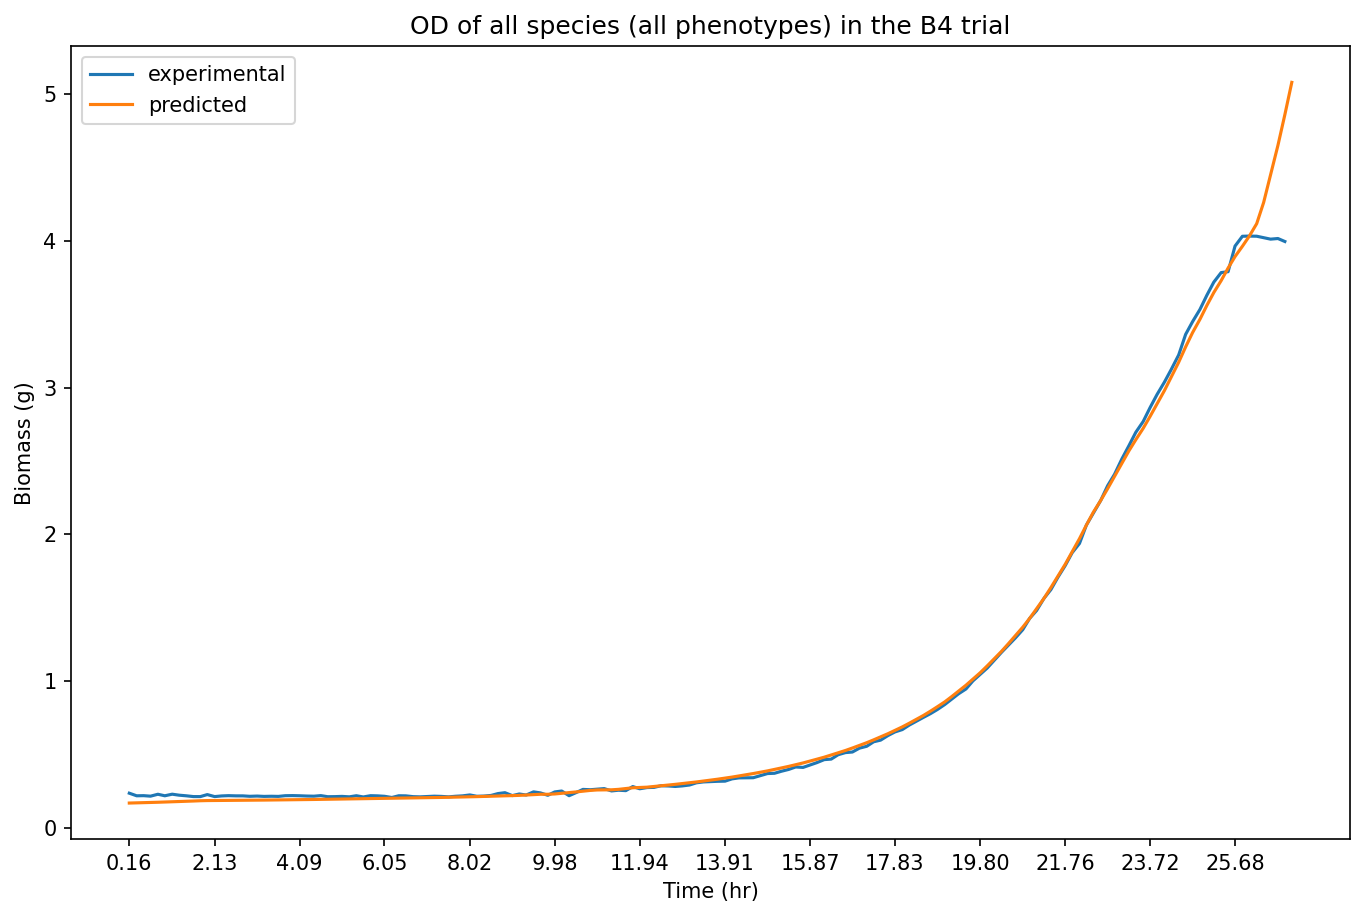

In [61]:
from datetime import datetime
%run mscommfitting.py

graphs = [
    {
        'trial':'B4',
        'content': 'OD',
        'experimental_data': True
    }
]

mscommfit = MSCommFitting()
mscommfit.load_data(phenotypes_csv_path = 'PhenotypeStoichiometry.csv', 
                    signal_tsv_paths = {'RFP_pf-ec_4-29-22.txt':'ecoli', 'GFP_pf-ec_4-29-22.txt':'pf', 'OD_pf-ec_4-29-22.txt':'OD'},
                    media_conc_path = 'media_conc.csv',
                    species_abundance_path = 'species_abundances.csv',
                    carbon_conc_series = {'rows': {
                        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
                        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
                        }},
                    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,5,6,7,8,9,10,11,12]}, # 'wells': ['C2', 'G3', 'C12']}
                   # ignore_timesteps = [x for x in range(20,167)],
                    zip_path='mscomfit.zip'
                   )
print(datetime.today())
mscommfit.define_problem(parameters={
                                    'v':0.3,
                                    'cvmin': 100,
                                    'bcv': 100,
                                    'diffpos': 100,
                                    'diffneg': 100
                                    }, 
                         zip_name='simple_full_community.zip', 
                         final_relative_carbon_conc = 0.1, 
                         metabolites_to_track = ["cpd00179","cpd00029","cpd00136"], 
                         bad_data_timesteps = {'*':'23:'})
print(datetime.today())
%time mscommfit.compute(graphs, zip_name='simple_full_community.zip')
print(datetime.today())
print('growth Vmax:', mscommfit.parameters['v'], 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')

# Poster figure

The ['rxn name', 'rxn'] columns were dropped from the phenotypes CSV.
['ecoli', 'pf', 'OD']
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the ecoli measurements.
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the pf m

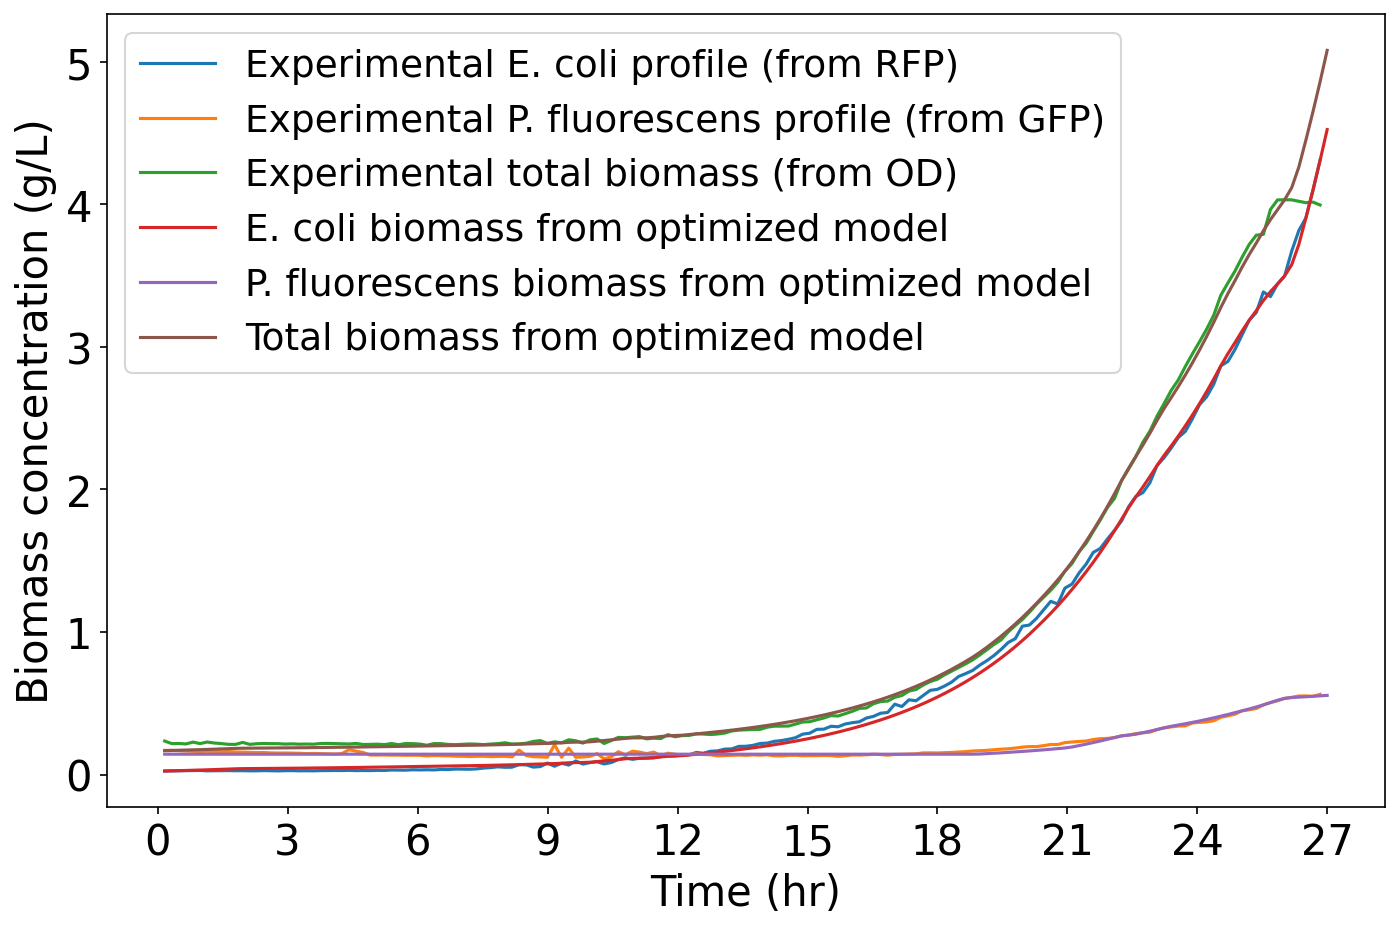

In [106]:
from datetime import datetime
%run mscommfitting.py

graphs = [
    {
        'trial':'B4',
        'content': 'all_biomass',
        'experimental_data': True
    }
]

mscommfit = MSCommFitting()
mscommfit.load_data(phenotypes_csv_path = 'PhenotypeStoichiometry.csv', 
                    signal_tsv_paths = {'RFP_pf-ec_4-29-22.txt':'ecoli', 'GFP_pf-ec_4-29-22.txt':'pf', 'OD_pf-ec_4-29-22.txt':'OD'},
                    media_conc_path = 'media_conc.csv',
                    species_abundance_path = 'species_abundances.csv',
                    carbon_conc_series = {'rows': {
                        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
                        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
                        }},
                    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,5,6,7,8,9,10,11,12]}, # 'wells': ['C2', 'G3', 'C12']}
                   # ignore_timesteps = [x for x in range(20,167)],
                    zip_path='mscomfit.zip'
                   )
print(datetime.today())
mscommfit.define_problem(parameters={
                                    'v':0.3,
                                    'cvmin': 100,
                                    'bcv': 100,
                                    'diffpos': 100,
                                    'diffneg': 100
                                    }, 
                         zip_name='simple_full_community.zip', 
                         final_relative_carbon_conc = 0.1, 
                         metabolites_to_track = ["cpd00179","cpd00029","cpd00136"], 
                         bad_data_timesteps = {'*':'23:'})
print(datetime.today())
%time mscommfit.compute(graphs, zip_name='simple_full_community.zip', publishing=True)
print(datetime.today())
print('growth Vmax:', mscommfit.parameters['v'], 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')

## Export concentration figures

The ['rxn name', 'rxn'] columns were dropped from the phenotypes CSV.
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements.
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the pf measurements.
The ['B2', '

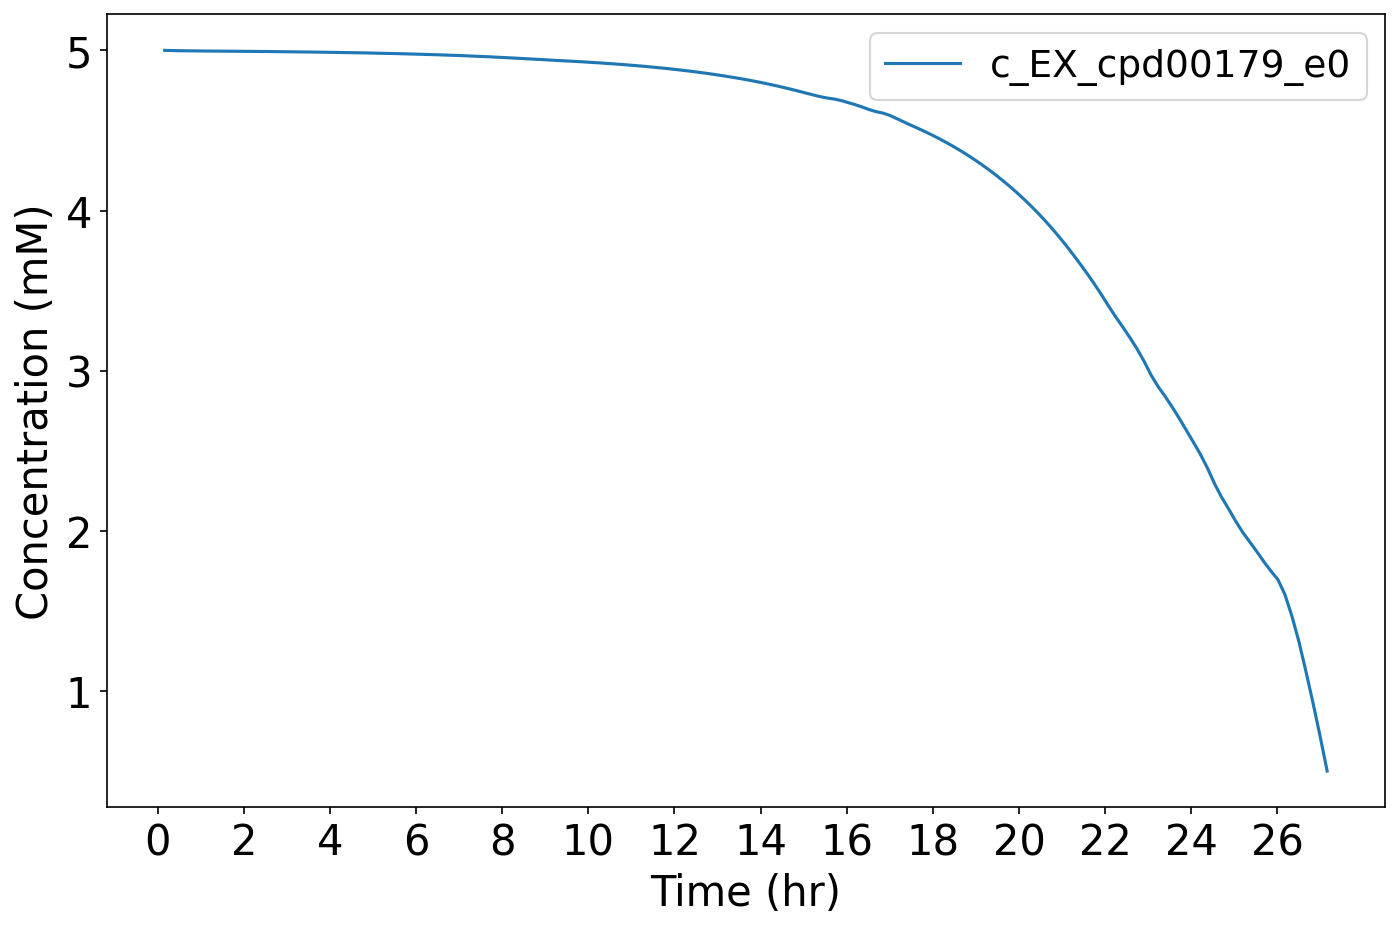

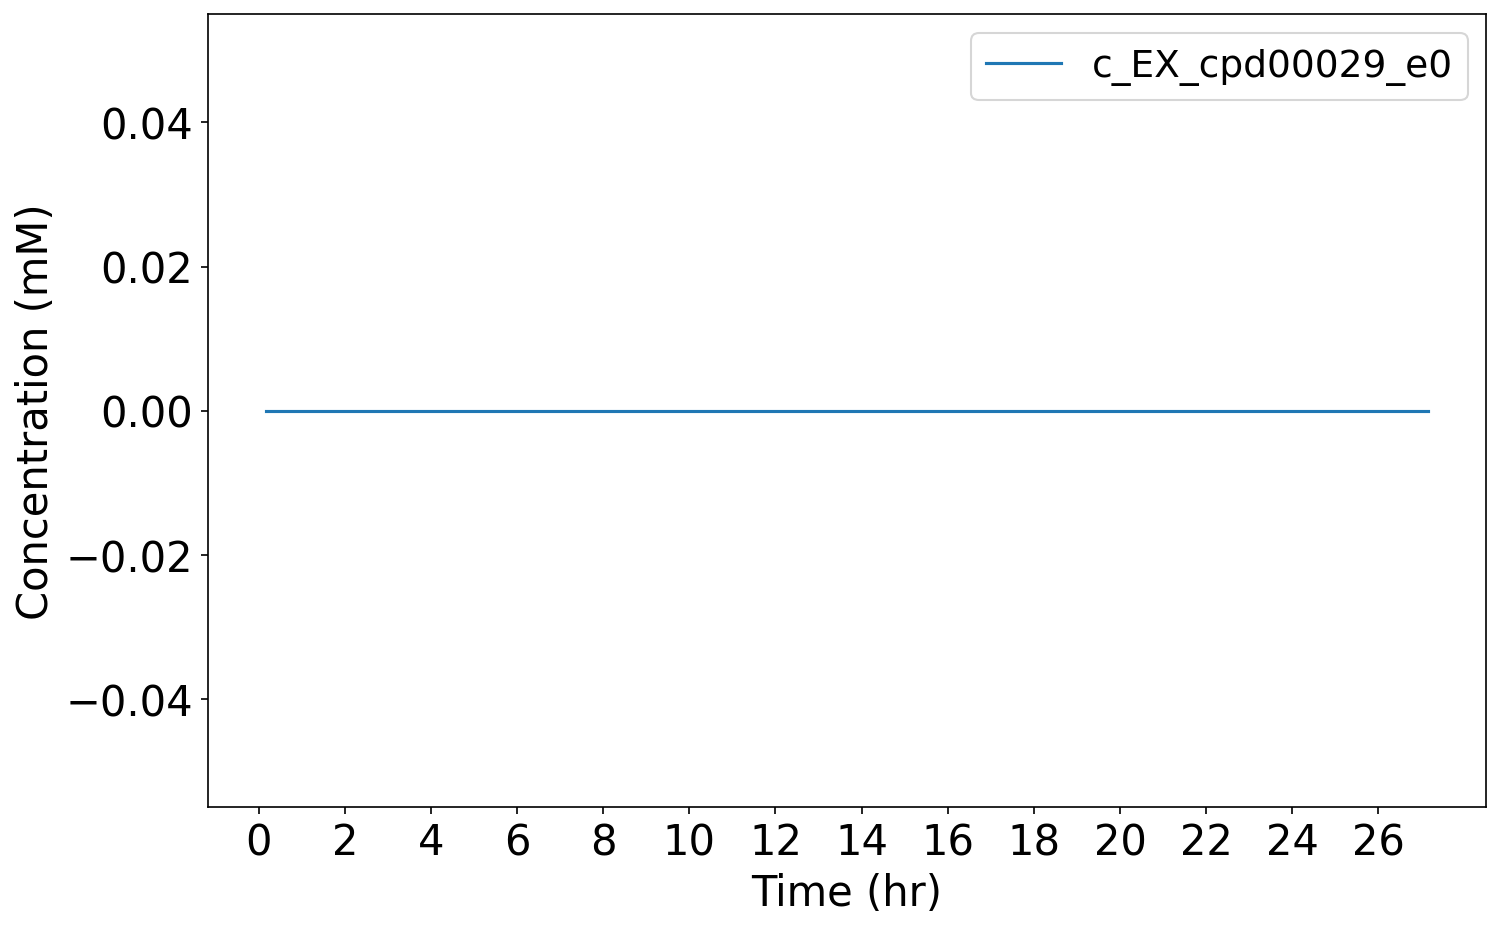

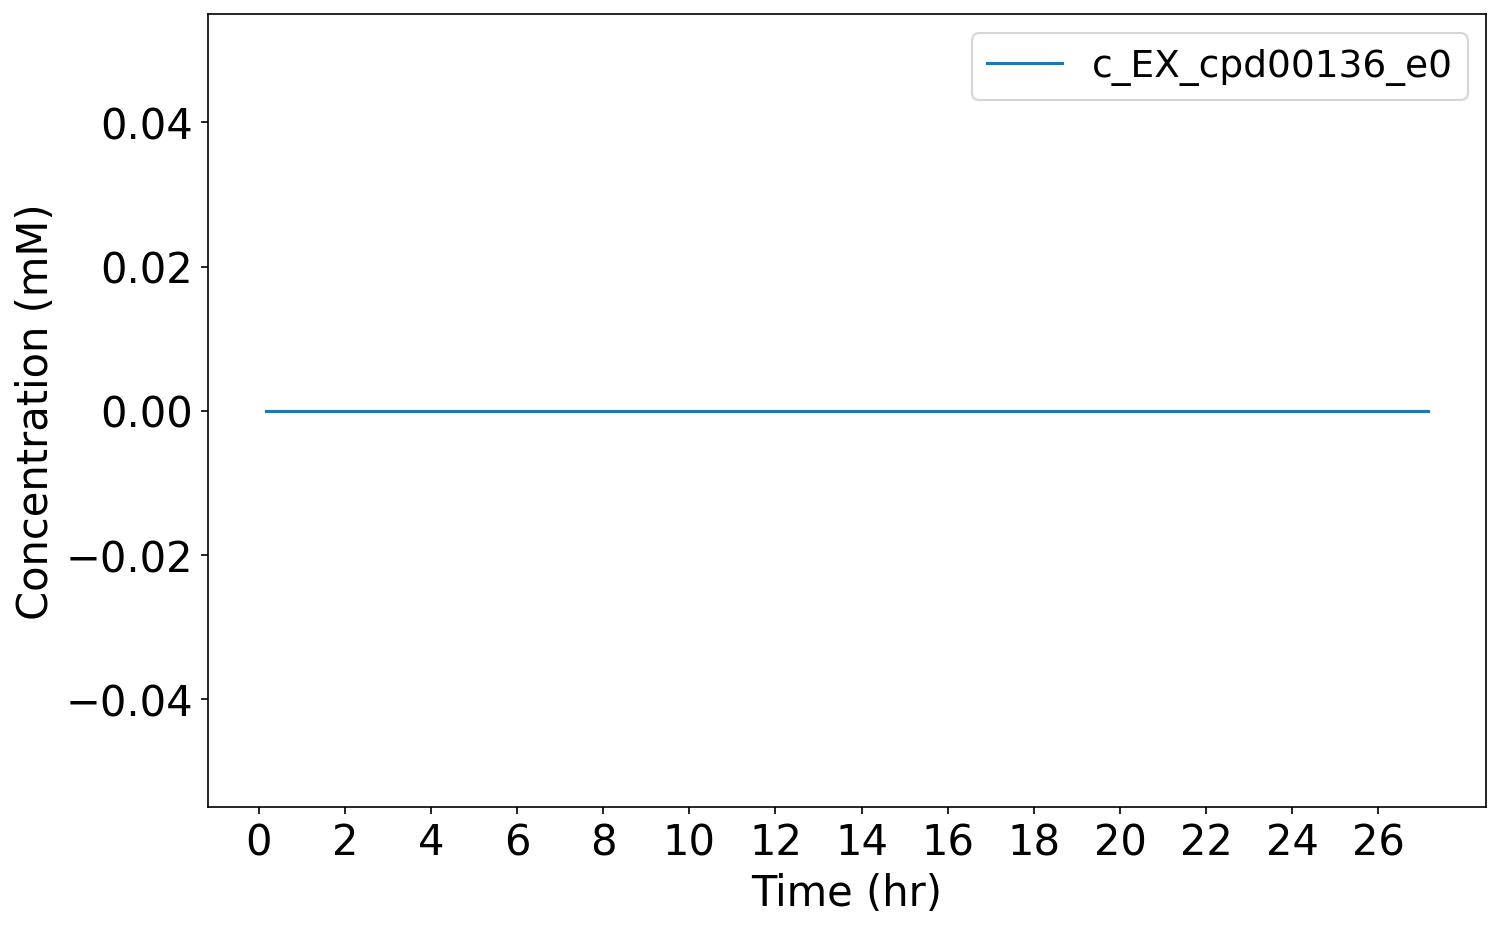

In [14]:
from datetime import datetime
from zipfile import ZipFile
from pandas import read_csv
import os
%run mscommfitting.py
# with ZipFile('msComFit.zip', 'r') as zp:
#     zp.extractall()
# fluxes_df = read_csv('PhenotypeStoichiometry.csv')
graphs = []
metabolites_to_track = ["cpd00179","cpd00029","cpd00136"]
for metabolite in metabolites_to_track: # fluxes_df['rxn'].to_list():
    graphs.append({
        'trial':'B4',
        'content': metabolite,
        'species': 'ecoli',
        'phenotype': 'malt'
    })

mscommfit = MSCommFitting()
mscommfit.load_data(phenotypes_csv_path = 'PhenotypeStoichiometry.csv', 
                    signal_csv_paths = {'path':'PF-EC 4-29-22 ratios and 4HB changes (1).xlsx', 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
                    media_conc_path = 'media_conc.csv',
                    species_abundance_path = 'species_abundances.csv',
                    carbon_conc_series = {'rows': {
                        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
                        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
                        }},
                    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,5,6,7,8,9,10,11,12]}, # 'wells': ['C2', 'G3', 'C12']}
                   # ignore_timesteps = [x for x in range(20,167)],
                    extract_zip_path='figures.zip'
                   )
print(datetime.today())
mscommfit.define_problem(parameters={
                                    'v':0.3,
                                    'cvmin': 100,
                                    'bcv': 100,
                                    'diffpos': 100,
                                    'diffneg': 100
                                    }, 
                         export_zip_name='figures.zip', 
                         final_relative_carbon_conc = 0.1, 
                         metabolites_to_track = metabolites_to_track, 
                         bad_data_timesteps = {'*':'23:'},
                         zero_start=["cpd00029"])
print(datetime.today())
%time mscommfit.compute(graphs, export_zip_name='figures.zip', publishing=True)
print(datetime.today())
print('growth Vmax:', mscommfit.parameters['v'], 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')

# Full system sans bad data

The ['rxn name', 'rxn'] columns were dropped from the phenotypes CSV.
['ecoli', 'pf', 'OD']
The ['B2', 'B12', 'C2', 'C12', 'D2', 'D12', 'E2', 'E12', 'F2', 'F12', 'G2', 'G12'] trials were removed from the ecoli measurements, with their deviation over time being less than the threshold of 2.
The ['B2', 'B3', 'B12', 'C2', 'C12', 'D2', 'D12', 'E12', 'F12', 'G12'] trials were removed from the pf measurements, with their deviation over time being less than the threshold of 2.
2022-07-17 19:11:55.210449
Solver: <class 'optlang.glpk_interface.Model'>
Done with biomass loop: 0.6630208333333333 min
Done with metabolites loop: 1.6153645833333334 min
Done with the dbc & diffc loop: 1.4127604166666667 min
Done with loading the variables, constraints, and objective: 1.7578125 min
Done exporting the content: 2.9911458333333334 min
2022-07-17 19:20:24.925398
{'trial': 'B4', 'content': 'OD', 'experimental_data': True}
The solution is optimal.
CPU times: total: 46min 29s
Wall time: 46min 29s
2022-07-17 

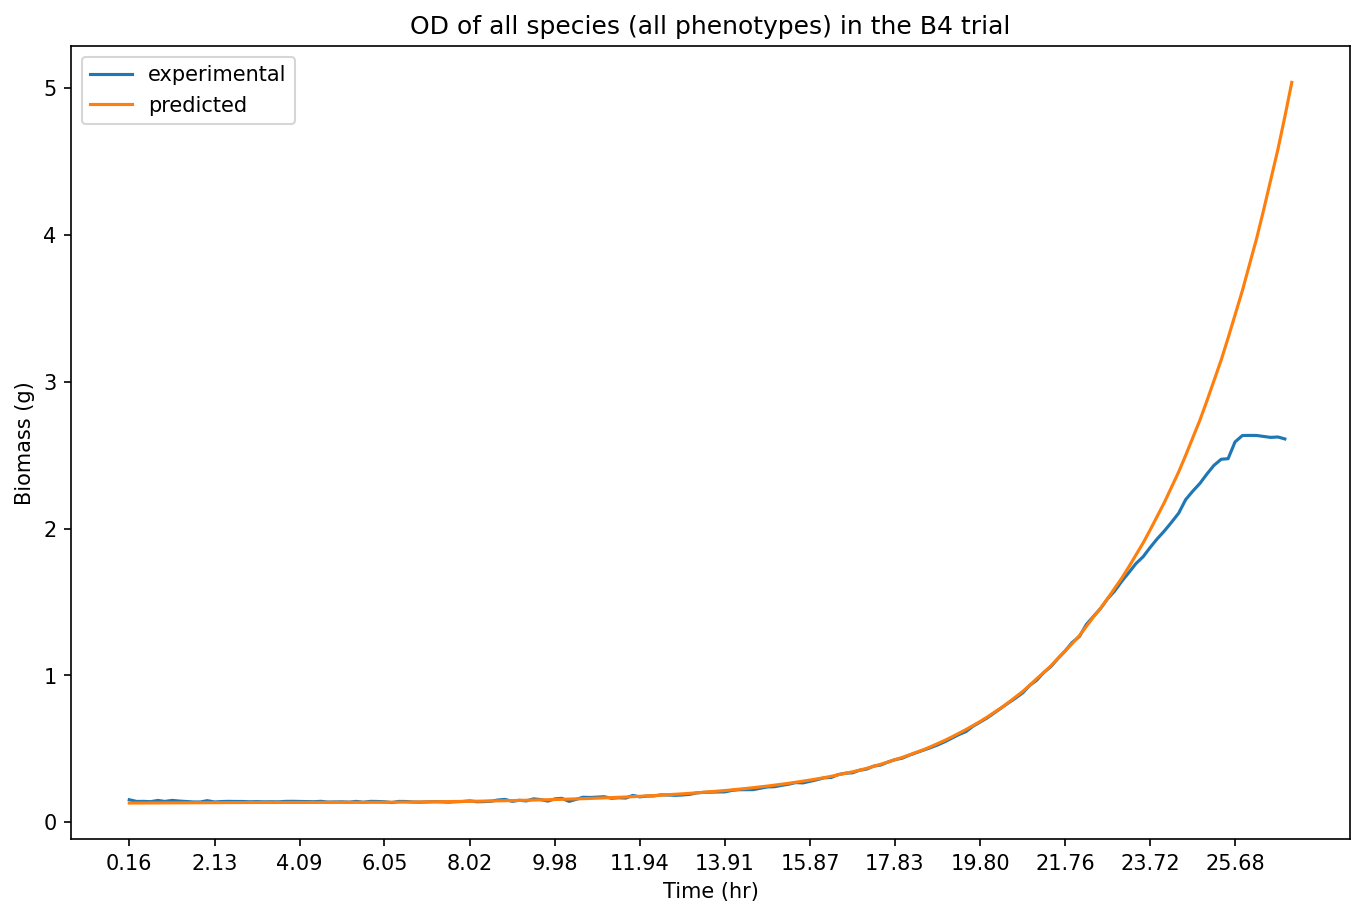

In [57]:
from datetime import datetime
%run mscommfitting.py

graphs = [
    {
        'trial':'B4',
        'content': 'OD',
        'experimental_data': True
    }
]

mscommfit = MSCommFitting()
mscommfit.load_data(phenotypes_csv_path = 'PhenotypeStoichiometry.csv', 
                    signal_tsv_paths = {'RFP_pf-ec_4-29-22.txt':'ecoli', 'GFP_pf-ec_4-29-22.txt':'pf', 'OD_pf-ec_4-29-22.txt':'OD'},
                    media_conc_path = 'media_conc.csv',
                    species_abundance_path = 'species_abundances.csv',
                    carbon_conc_series = {'rows': {
                        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
                        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
                        }},
                    # ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,5,6,7,8,9,10,11,12]}, # 'wells': ['C2', 'G3', 'C12']}
                   # ignore_timesteps = [x for x in range(20,167)],
                    zip_path='mscomfit.zip'
                   )
print(datetime.today())
mscommfit.define_problem(parameters={
                                    'v':0.3,
                                    'cvmin': 100,
                                    'bcv': 100,
                                    'diffpos': 100,
                                    'diffneg': 100
                                    }, 
                         zip_name='simple_full_community.zip', 
                         final_relative_carbon_conc = 0.1, 
                         metabolites_to_track = ["cpd00179","cpd00029","cpd00136"], 
                         bad_data_timesteps = {'*':'23:'})
print(datetime.today())
%time mscommfit.compute(graphs, zip_name='simple_full_community.zip')
print(datetime.today())
print('growth Vmax:', mscommfit.parameters['v'], 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')

# plotting phenotypes of each species

In [1]:
# define the environment path 
import os
local_cobrakbase_path = os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
os.environ["HOME"] = local_cobrakbase_path

# import the models
import cobrakbase
token = 'X3F37BL3QVM3WEULFGLPNFHGAPHPZA5U'
kbase_api = cobrakbase.KBaseAPI(token)
# model1 = kbase_api.get_from_ws("iML1515",76994)
# model2 = kbase_api.get_from_ws("iSB1139.kb.gf",30650)

cobrakbase 0.2.8


/opt/anaconda3/lib/python3.7/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements.
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the pf measurements.
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C

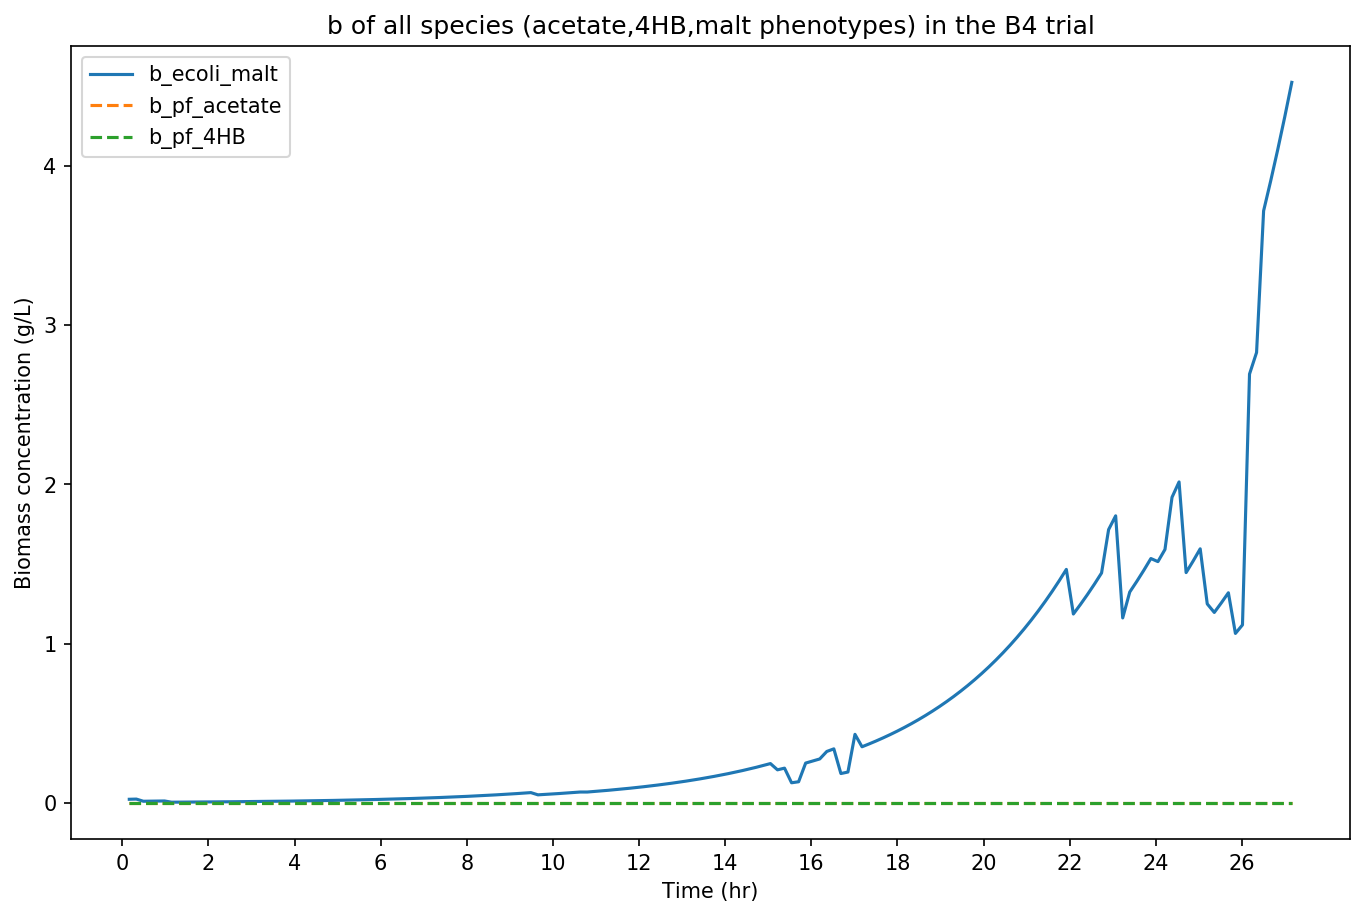

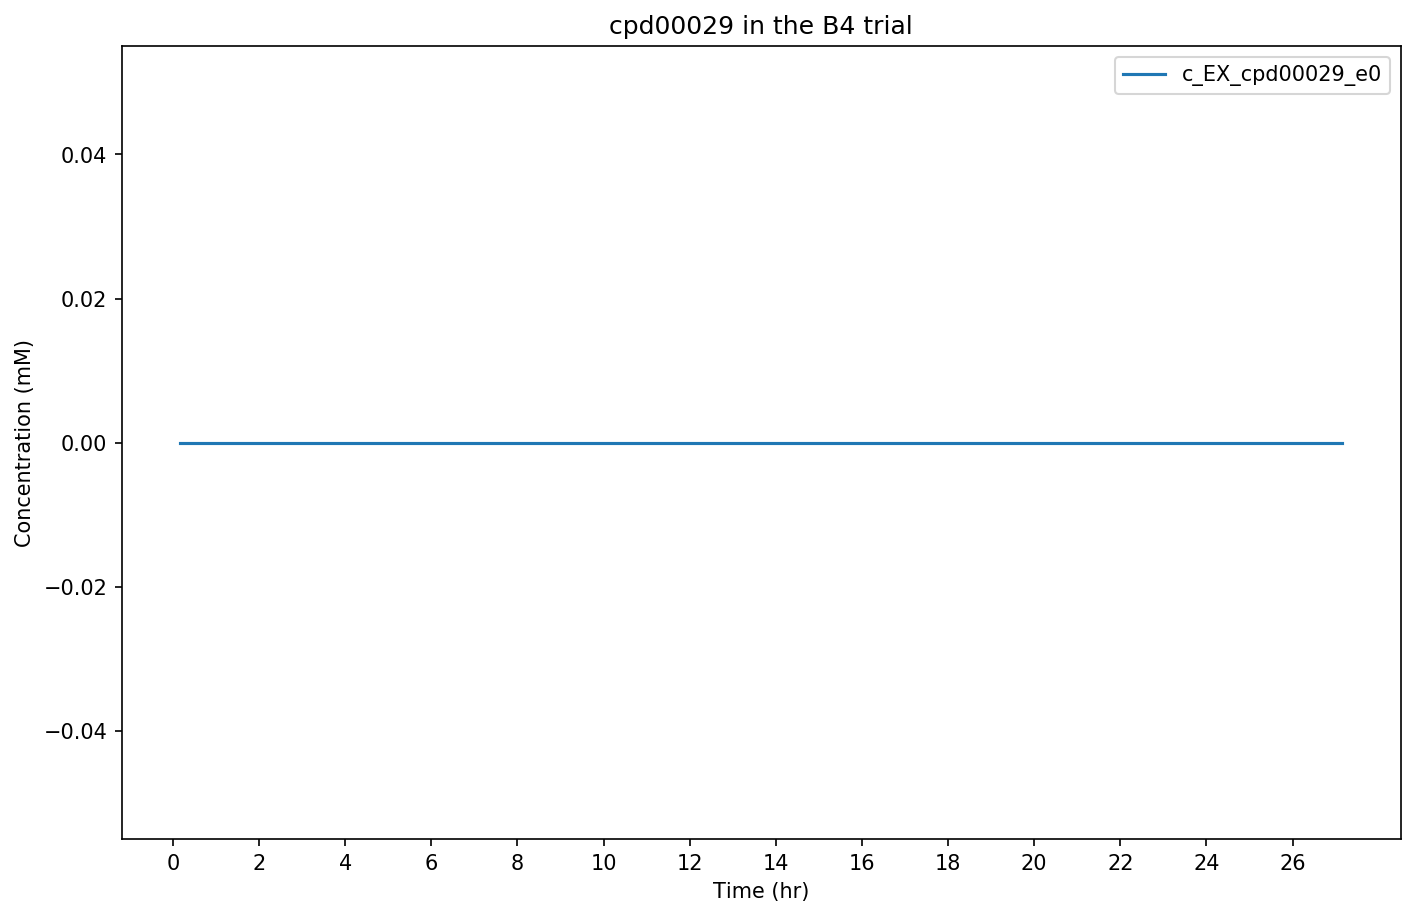

In [2]:
from datetime import datetime
from time import process_time
from pandas import set_option
set_option("display.max_rows", None)
# import the KBase objects
graphs = [
    {
        'trial':'B4',
        'content': 'biomass',
        # "species": ["ecoli"],
        'experimental_data': True
    },
    {
        'trial':'B4',
        'content': "cpd00029",
    }
]

# run MSCommFitting
%run mscommfitting.py
time1 = process_time()
mscommfit = MSCommFitting()
mscommfit.load_data(#phenotypes_csv_path = 'PhenotypeStoichiometry.csv', 
                    community_members = {
                        kbase_api.get_from_ws("iML1515",76994): {
                            'name': 'ecoli', 
                            'phenotypes': {#'acetate': kbase_api.get_from_ws('93465/13/1'), 
                                        'malt': {"cpd00179":[-1,-1]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
                            }
                        },
                        kbase_api.get_from_ws("iSB1139.kb.gf",30650): {
                            'name': 'pf',
                            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                                        '4HB': {"cpd00136":[-1,-1]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
                            }
                        }
                    },
                    base_media = kbase_api.get_from_ws("93465/19/1"),
                    signal_csv_paths = {'path':'Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes (1).xlsx', 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
                    media_conc_path = 'Jeffs_data/media_conc.csv',
                    carbon_conc_series = {'rows': {
                        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
                        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
                        }},
                    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,5,6,7,8,9,10,11,12]}, # 'wells': ['C2', 'G3', 'C12']}
                   # ignore_timesteps = [x for x in range(20,167)],
                    # zip_path='mscomfit.zip'
                   )
time2 = process_time()
print(datetime.today(), (time2-time1)/60, 'minutes later')
mscommfit.define_problem(parameters={
                                    'v':3,
                                    'cvmin': 100,
                                    'bcv': 100,
                                    'diffpos': 100,
                                    'diffneg': 100
                                    }, 
                         # zip_name='simple_full_community.zip', 
                         final_relative_carbon_conc = 0.1, 
                         metabolites_to_track = ["cpd00179","cpd00029","cpd00136"], 
                         bad_data_timesteps = {'*':'23:'}, zero_start=["cpd00029"])
print(datetime.today())
%time mscommfit.compute(graphs) #, zip_name='simple_full_community.zip')
print('growth Vmax:', mscommfit.parameters['v'], 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')

# Demonstrating expedited speed of dictionaries versus Optlang API

In [1]:
from time import process_time
from optlang import Variable, Constraint, Objective, Model
from modelseedpy.core.optlanghelper import OptlangHelper
from json import dump

# optlang API and OptlangHelper API
time_1 = process_time()
model = Model()
variables, constraints = [], []
dict_vars, dict_cons = [], []
for t in range(1000):
    # define the variable
    var_name = f"g_{t}" ; var_bounds = (0, 1000) ; dict_vars.append((var_name, var_bounds, "continuous"))
    var = Variable(var_name, lb=0, ub=1000)
    variables.append(var)
    
    # define the constraint
    cons_name = f"const_{t}" ; cons_bounds = (-1000, 1000) ; cons_expr = [(t,var_name)]
    dict_cons.append((cons_name, cons_bounds, cons_expr))
    constraints.append(Constraint(t*var, name=cons_name, lb=-1000, ub=1000))
model.add(variables) ; model.add(constraints)

# define the objective
model.objective = Objective(sum(variables))
dict_obj = ("Test Helper Dictionary", [var.name for var in variables], "max")

with open("API_Optlang_model.json", 'w') as out:
    dump(model.to_json(), out, indent=3)
    
dict_model = OptlangHelper.define_model("OptlangHelper test", dict_vars, dict_cons, dict_obj)
with open("OptlangHelper_model.json", 'w') as out:
    dump(dict_model, out, indent=3)
    
time_2 = process_time()
print(f'Optlang method {time_2-time_1} seconds')

# dictionary
time_3 = process_time()
model_json = {
    'name':"Test JSON model",
    'variables':[],
    'constraints':[],
    "objective": {
        "name": "sample_objective",
        "expression":{"type": "Add", "args":[]},
        "direction": "max"
    }
}
for t in range(1000):
    model_json['variables'].append({"name": f"g_{t}", "lb": 0, "ub": 1000, "type": "continuous"})
    model_json['constraints'].append({
        "name": f"const_{t}",
        "expression": {
              "type": "Mul",
              "args": [
                 {
                    "type": "Number",
                    "value": t
                 },
                 {
                    "type": "Symbol",
                    "name": f"g_{t}"
                 }
              ]
           },
         "lb": -1000,
         "ub": 1000,
         "indicator_variable": None,
         "active_when": 1
    })
    model_json['objective']["expression"]["args"].append({
        "type": "Mul",
        "args": [
          {
             "type": "Number",
             "value": 1.0
          },
          {
             "type": "Symbol",
             "name": f"g_{t}",
          }
        ]
    })
model2 = Model.from_json(model_json)
model3 = Model.from_json(dict_model)
time_4 = process_time()
print(f'dictionary method {time_4-time_3} seconds')
model.optimize(); model1_opt = model.objective.value
model2.optimize(); model2_opt = model2.objective.value
model3.optimize(); model3_opt = model3.objective.value
if model1_opt != model2_opt:
    print(model1_opt, model2_opt)
elif model1_opt != model3_opt:
    print(model1_opt, model3_opt)
else:
    print("models parity")

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Optlang method 4.21875 seconds
dictionary method 1.90625 seconds
models parity


In [25]:
from pprint import pprint
# from typing import Union
from json import dump

def define_constraint_expression(cons_expression):
    if len(cons_expression) > 1:
        constraint_expression = {
            "type": "Add",
            "args": []
        }
        for term in cons_expression:
            term_expression = {
                "type": "Mul",
                "args": []
            }
            for value in term:
                if isinstance(value, str):
                    term_expression["args"].append({
                        "type":"Symbol",
                        "name": value
                    })
                elif isinstance(value, (float, int)):
                    term_expression["args"].append({
                        "type":"Number",
                        "name": value
                    })
            constraint_expression["args"].append(term_expression)
    else:
        for value in cons_expression[0]:
            constraint_expression = {
                "type": "Mul",
                "args": []
            }
            if isinstance(value, str):
                constraint_expression["args"].append({
                    "type":"Symbol",
                    "name": value
                })
            elif isinstance(value, (float, int)):
                constraint_expression["args"].append({
                    "type":"Number",
                    "name": value
                })
    return constraint_expression



cons_expression = [("var1", 123), ("var2", 1)]
constraint = {
        "name": "test",
        "expression": define_constraint_expression(cons_expression),
         "lb": 0,
         "ub": 1000,
         "indicator_variable": None,
         "active_when": 1
    }
with open("test.json", 'w') as out:
    dump(constraint, out, indent=3)
pprint(constraint)

{'active_when': 1,
 'expression': {'args': [{'args': [{'name': 'var1', 'type': 'Symbol'},
                                   {'name': 123, 'type': 'Number'}],
                          'type': 'Mul'},
                         {'args': [{'name': 'var2', 'type': 'Symbol'},
                                   {'name': 1, 'type': 'Number'}],
                          'type': 'Mul'}],
                'type': 'Add'},
 'indicator_variable': None,
 'lb': 0,
 'name': 'test',
 'ub': 1000}
